In [110]:
#packages
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [111]:
# Read in the dataset
df = pd.read_csv(r'C:\Users\ELCOT\Desktop\Srini\VS Code\Projects\Vaccine\Data\Vaccine.csv')
df.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0               1.0  ...   
2                     0.0                        0.0               0.0  ...   
3                     1.0                        0.0               0.0  ...   
4                     1.0                        0.0               1.0  ...   

    race     sex               income_level  marital_status  housing_status  \
0  White  Female              Below Poverty     Not Married             Own   
1  White    Male              Below Poverty     Not Married            Rent   
2  White    Male  <= $75,000, Above Poverty     Not Married             Own   
3  White  Female              Below Poverty     Not Married            Rent   
4  White  Female  <= $75,000, Above Poverty         Married             Own   

           employment                census_msa  no_of_adults  no_of_children  \
0  Not in Labor Force                   Non-MSA           0.0             0.0   
1            Employed  MSA, Not Principle  City           0.0             0.0   
2            Employed  MSA, Not Principle  City           2.0             0.0   
3  Not in Labor Force       MSA, Principle City           0.0             0.0   
4            Employed  MSA, Not Principle  City           1.0             0.0   

   h1n1_vaccine  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [112]:
df.shape

(26707, 34)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [114]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

# Handling the null values using median()

In [115]:
#numarical column and median()
df["h1n1_worry"].fillna( df["h1n1_worry"].median(),inplace=True)
df["h1n1_awareness"].fillna( df["h1n1_awareness"].median(),inplace=True)
df["antiviral_medication"].fillna( df["antiviral_medication"].median(),inplace=True)
df["contact_avoidance"].fillna( df["contact_avoidance"].median(),inplace=True)
df["bought_face_mask"].fillna( df["bought_face_mask"].median(),inplace=True)
df["wash_hands_frequently"].fillna( df["wash_hands_frequently"].median(),inplace=True)
df["avoid_large_gatherings"].fillna( df["avoid_large_gatherings"].median(),inplace=True)
df["reduced_outside_home_cont"].fillna( df["reduced_outside_home_cont"].median(),inplace=True)
df["avoid_touch_face"].fillna( df["avoid_touch_face"].median(),inplace=True)
df["dr_recc_h1n1_vacc"].fillna( df["dr_recc_h1n1_vacc"].median(),inplace=True)
df["dr_recc_seasonal_vacc"].fillna( df["dr_recc_seasonal_vacc"].median(),inplace=True)
df["chronic_medic_condition"].fillna( df["chronic_medic_condition"].median(),inplace=True)
df["cont_child_undr_6_mnths"].fillna( df["cont_child_undr_6_mnths"].median(),inplace=True)
df["is_health_worker"].fillna( df["is_health_worker"].median(),inplace=True)
df["has_health_insur"].fillna( df["has_health_insur"].median(),inplace=True)
df["is_h1n1_vacc_effective"].fillna( df["is_h1n1_vacc_effective"].median(),inplace=True)
df["is_h1n1_risky"].fillna( df["is_h1n1_risky"].median(),inplace=True)
df["sick_from_h1n1_vacc"].fillna( df["sick_from_h1n1_vacc"].median(),inplace=True)
df["is_seas_vacc_effective"].fillna( df["is_seas_vacc_effective"].median(),inplace=True)
df["is_seas_risky"].fillna( df["is_seas_risky"].median(),inplace=True)
df["sick_from_seas_vacc"].fillna( df["sick_from_seas_vacc"].median(),inplace=True)
df["no_of_adults"].fillna( df["no_of_adults"].median(),inplace=True)
df["no_of_children"].fillna( df["no_of_children"].median(),inplace=True)

#numarical column and median()
df["h1n1_worry"].fillna(method='ffill', inplace=True)
df["h1n1_awareness"].fillna( method='ffill', inplace=True)
df["antiviral_medication"].fillna( method='ffill', inplace=True)
df["contact_avoidance"].fillna( method='ffill', inplace=True)
df["bought_face_mask"].fillna( method='ffill', inplace=True)
df["wash_hands_frequently"].fillna( method='ffill', inplace=True)
df["avoid_large_gatherings"].fillna( method='ffill', inplace=True)
df["reduced_outside_home_cont"].fillna( method='ffill', inplace=True)
df["avoid_touch_face"].fillna( method='ffill', inplace=True)
df["dr_recc_h1n1_vacc"].fillna( method='ffill', inplace=True)
df["dr_recc_seasonal_vacc"].fillna( method='ffill', inplace=True)
df["chronic_medic_condition"].fillna( method='ffill', inplace=True)
df["cont_child_undr_6_mnths"].fillna( method='ffill', inplace=True)
df["is_health_worker"].fillna( method='ffill', inplace=True)
df["has_health_insur"].fillna( method='ffill', inplace=True)
df["is_h1n1_vacc_effective"].fillna( method='ffill', inplace=True)
df["is_h1n1_risky"].fillna(method='ffill', inplace=True)
df["sick_from_h1n1_vacc"].fillna(method='ffill', inplace=True)
df["is_seas_vacc_effective"].fillna( method='ffill', inplace=True)
df["is_seas_risky"].fillna(method='ffill', inplace=True)
df["sick_from_seas_vacc"].fillna(method='ffill', inplace=True)
df["no_of_adults"].fillna(method='ffill', inplace=True)
df["no_of_children"].fillna(method='ffill', inplace=True)

In [116]:
#Filling empty value as Unkown
df['qualification'].fillna(method='ffill', inplace=True)
df['income_level'].fillna(method='ffill', inplace=True)
df['marital_status'].fillna(method='ffill', inplace=True)
df['housing_status'].fillna(method='ffill', inplace=True)
df['employment'].fillna(method='ffill', inplace=True)

In [117]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [118]:
#checking the unique values of the all columns

for i in df.columns:
  print(i,":",df[i].nunique())

unique_id : 26707
h1n1_worry : 4
h1n1_awareness : 3
antiviral_medication : 2
contact_avoidance : 2
bought_face_mask : 2
wash_hands_frequently : 2
avoid_large_gatherings : 2
reduced_outside_home_cont : 2
avoid_touch_face : 2
dr_recc_h1n1_vacc : 2
dr_recc_seasonal_vacc : 2
chronic_medic_condition : 2
cont_child_undr_6_mnths : 2
is_health_worker : 2
has_health_insur : 2
is_h1n1_vacc_effective : 5
is_h1n1_risky : 5
sick_from_h1n1_vacc : 5
is_seas_vacc_effective : 5
is_seas_risky : 5
sick_from_seas_vacc : 5
age_bracket : 5
qualification : 4
race : 4
sex : 2
income_level : 3
marital_status : 2
housing_status : 2
employment : 3
census_msa : 3
no_of_adults : 4
no_of_children : 4
h1n1_vaccine : 2


In [119]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

## chaning the datatype

In [120]:
#Change Datatype Float into Int
df["h1n1_worry"]= df["h1n1_worry"].astype(int)
df["h1n1_awareness"]= df["h1n1_awareness"].astype(int)
df["antiviral_medication"]= df["antiviral_medication"].astype(int)
df["contact_avoidance"]= df["contact_avoidance"].astype(int)
df["bought_face_mask"]= df["bought_face_mask"].astype(int)
df["wash_hands_frequently"]= df["wash_hands_frequently"].astype(int)
df["avoid_large_gatherings"]= df["avoid_large_gatherings"].astype(int)
df["reduced_outside_home_cont"]= df["reduced_outside_home_cont"].astype(int)
df["avoid_touch_face"]= df["avoid_touch_face"].astype(int)
df["dr_recc_h1n1_vacc"]= df["dr_recc_h1n1_vacc"].astype(int)
df["dr_recc_seasonal_vacc"]= df["dr_recc_seasonal_vacc"].astype(int)
df["chronic_medic_condition"]= df["chronic_medic_condition"].astype(int)
df["cont_child_undr_6_mnths"]= df["cont_child_undr_6_mnths"].astype(int)
df["is_health_worker"]= df["is_health_worker"].astype(int)
df["has_health_insur"]= df["has_health_insur"].astype(int)
df["is_h1n1_vacc_effective"]= df["is_h1n1_vacc_effective"].astype(int)
df["is_h1n1_risky"]= df["is_h1n1_risky"].astype(int)
df["sick_from_h1n1_vacc"]= df["sick_from_h1n1_vacc"].astype(int)
df["is_seas_vacc_effective"]= df["is_seas_vacc_effective"].astype(int)
df["is_seas_risky"]= df["is_seas_risky"].astype(int)
df["sick_from_seas_vacc"]= df["sick_from_seas_vacc"].astype(int)
df["no_of_adults"]= df["no_of_adults"].astype(int)
df["no_of_children"]= df["no_of_children"].astype(int)

In [121]:
df.dtypes

unique_id                     int64
h1n1_worry                    int32
h1n1_awareness                int32
antiviral_medication          int32
contact_avoidance             int32
bought_face_mask              int32
wash_hands_frequently         int32
avoid_large_gatherings        int32
reduced_outside_home_cont     int32
avoid_touch_face              int32
dr_recc_h1n1_vacc             int32
dr_recc_seasonal_vacc         int32
chronic_medic_condition       int32
cont_child_undr_6_mnths       int32
is_health_worker              int32
has_health_insur              int32
is_h1n1_vacc_effective        int32
is_h1n1_risky                 int32
sick_from_h1n1_vacc           int32
is_seas_vacc_effective        int32
is_seas_risky                 int32
sick_from_seas_vacc           int32
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status              

In [122]:
df.tail()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
26702      26702           2               0                     0   
26703      26703           1               2                     0   
26704      26704           2               2                     0   
26705      26705           1               1                     0   
26706      26706           0               0                     0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
26702                  1                 0                      0   
26703                  1                 0                      1   
26704                  1                 1                      1   
26705                  0                 0                      0   
26706                  1                 0                      0   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
26702                       0                          1                 0   
26703                       0                          0                 0   
26704                       1                          0                 1   
26705                       0                          0                 1   
26706                       0                          0                 0   

       ...      race     sex               income_level  marital_status  \
26702  ...     White  Female  <= $75,000, Above Poverty     Not Married   
26703  ...     White    Male  <= $75,000, Above Poverty     Not Married   
26704  ...     White  Female  <= $75,000, Above Poverty     Not Married   
26705  ...  Hispanic  Female  <= $75,000, Above Poverty         Married   
26706  ...     White    Male  <= $75,000, Above Poverty         Married   

       housing_status          employment                census_msa  \
26702             Own  Not in Labor Force                   Non-MSA   
26703            Rent            Employed       MSA, Principle City   
26704             Own            Employed  MSA, Not Principle  City   
26705            Rent            Employed                   Non-MSA   
26706             Own  Not in Labor Force       MSA, Principle City   

       no_of_adults  no_of_children  h1n1_vaccine  
26702             0               0             0  
26703             1               0             0  
26704             0               0             0  
26705             1               0             0  
26706             1               0             0  

[5 rows x 34 columns]

In [123]:
df.to_csv("Vaccine_proper.csv",index= False)

In [124]:
df_final= pd.read_csv(r'C:\Users\ELCOT\Desktop\Srini\VS Code\Projects\Vaccine\Data\Vaccine_proper.csv')
df_final.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0           1               0                     0   
1          1           3               2                     0   
2          2           1               1                     0   
3          3           1               1                     0   
4          4           2               1                     0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                  0                 0                      0   
1                  1                 0                      1   
2                  1                 0                      0   
3                  1                 0                      1   
4                  1                 0                      1   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                       0                          1                 1  ...   
1                       0                          1                 1  ...   
2                       0                          0                 0  ...   
3                       1                          0                 0  ...   
4                       1                          0                 1  ...   

    race     sex               income_level  marital_status  housing_status  \
0  White  Female              Below Poverty     Not Married             Own   
1  White    Male              Below Poverty     Not Married            Rent   
2  White    Male  <= $75,000, Above Poverty     Not Married             Own   
3  White  Female              Below Poverty     Not Married            Rent   
4  White  Female  <= $75,000, Above Poverty         Married             Own   

           employment                census_msa  no_of_adults  no_of_children  \
0  Not in Labor Force                   Non-MSA             0               0   
1            Employed  MSA, Not Principle  City             0               0   
2            Employed  MSA, Not Principle  City             2               0   
3  Not in Labor Force       MSA, Principle City             0               0   
4            Employed  MSA, Not Principle  City             1               0   

   h1n1_vaccine  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [125]:
df_final.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

## LabelEncoder

In [126]:
# choosing the "LabelEncoder"
df_final["age_bracket"]= LabelEncoder().fit_transform(df_final[["age_bracket"]])
df_final["qualification"]= LabelEncoder().fit_transform(df_final[["qualification"]])
df_final["race"]= LabelEncoder().fit_transform(df_final[["race"]])
df_final["sex"]= LabelEncoder().fit_transform(df_final[["sex"]])
df_final["income_level"]= LabelEncoder().fit_transform(df_final[["income_level"]])
df_final["marital_status"]= LabelEncoder().fit_transform(df_final[["marital_status"]])
df_final["housing_status"]= LabelEncoder().fit_transform(df_final[["housing_status"]])
df_final["employment"]= LabelEncoder().fit_transform(df_final[["employment"]])
df_final["census_msa"]= LabelEncoder().fit_transform(df_final[["census_msa"]])

In [20]:
df_final["age_bracket"].unique()

array([3, 1, 0, 4, 2])

In [21]:
df_final["qualification"].unique()

array([1, 0, 2, 3])

In [22]:
df_final["race"].unique()

array([3, 0, 2, 1])

In [23]:
df_final["sex"].unique()

array([0, 1])

In [24]:
df_final["income_level"].unique()

array([2, 0, 1])

In [25]:
df_final["marital_status"].unique()

array([1, 0])

In [26]:
df_final["housing_status"].unique()

array([0, 1])

In [27]:
df_final["employment"].unique()

array([1, 0, 2])

In [28]:
df_final["census_msa"].unique()

array([2, 0, 1])

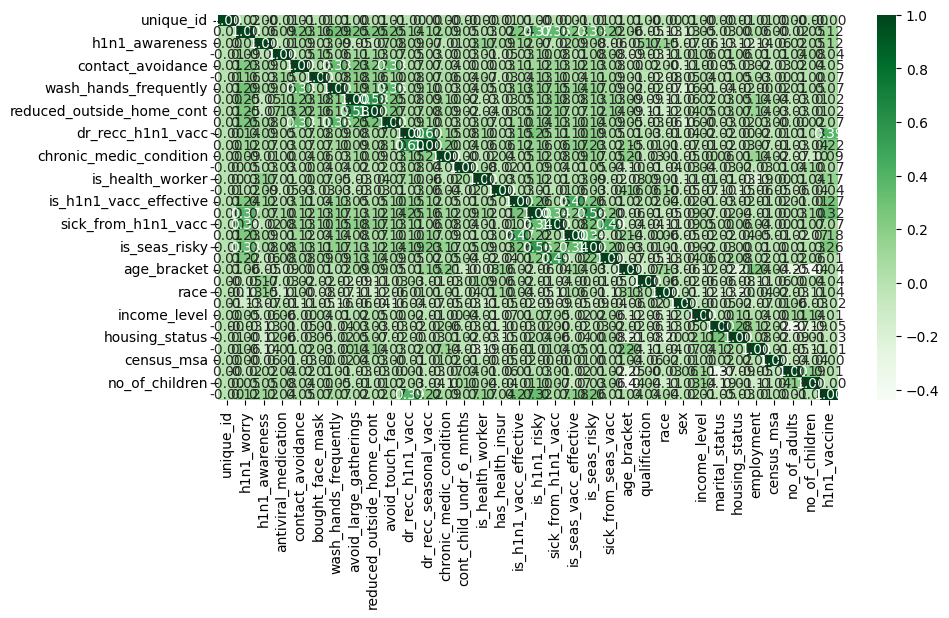

In [30]:
# Checking the Correlation using heatmap

df_corr= df_final.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [31]:
# checking the duplicate values
df_final.duplicated().sum()

0

In [32]:
# detecting the skewed columns using plot
def plot(df_final,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df_final[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df_final, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df_final, x=column)
  plt.title("Box plot for"+" "+column)

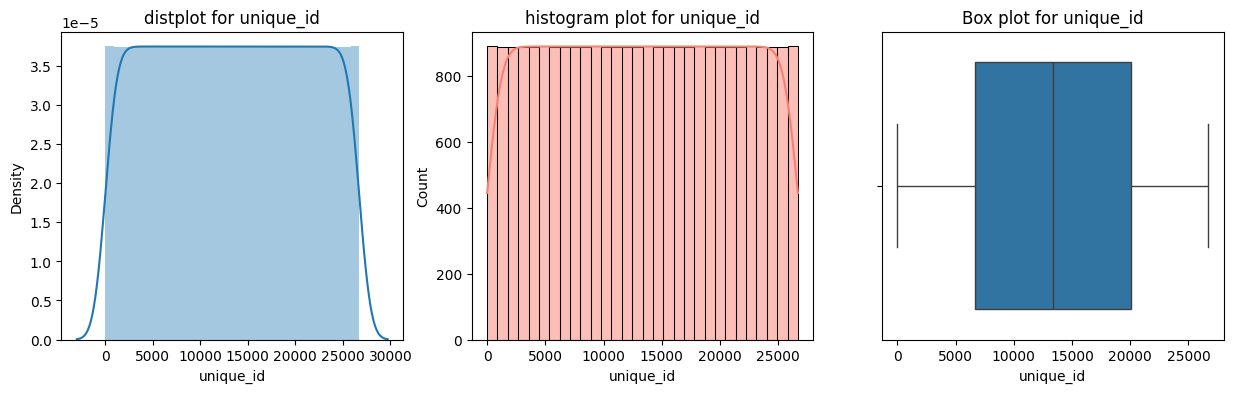

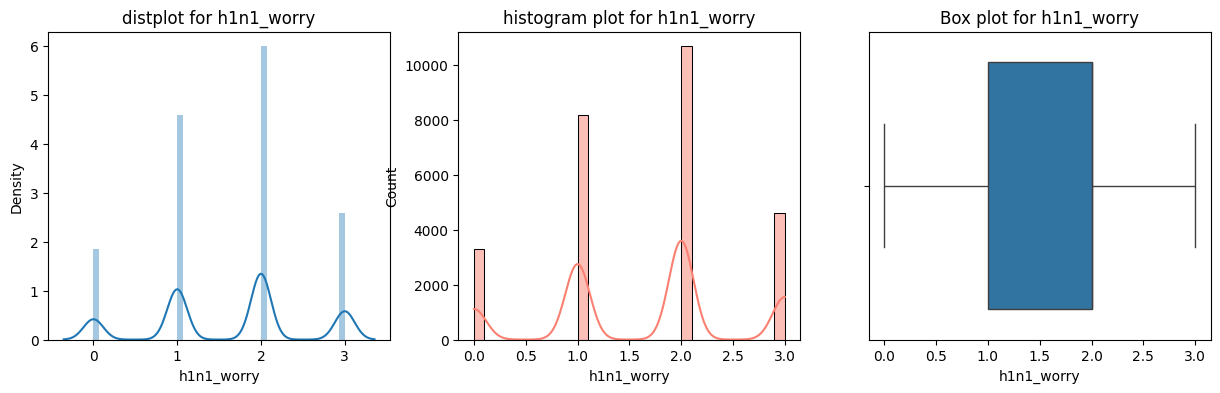

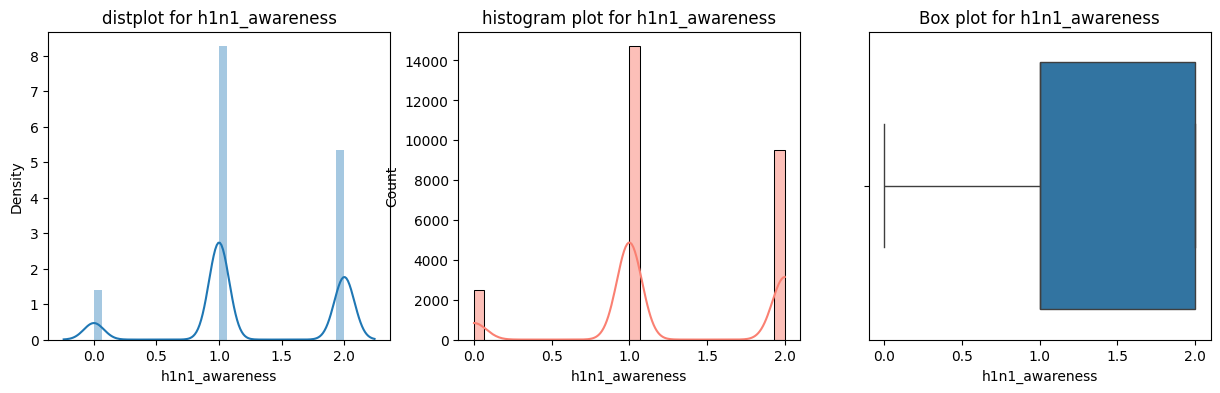

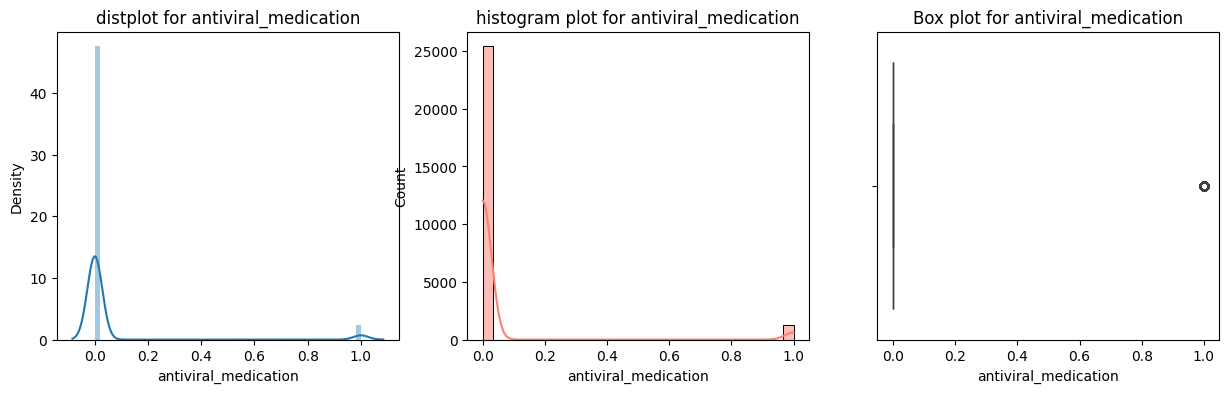

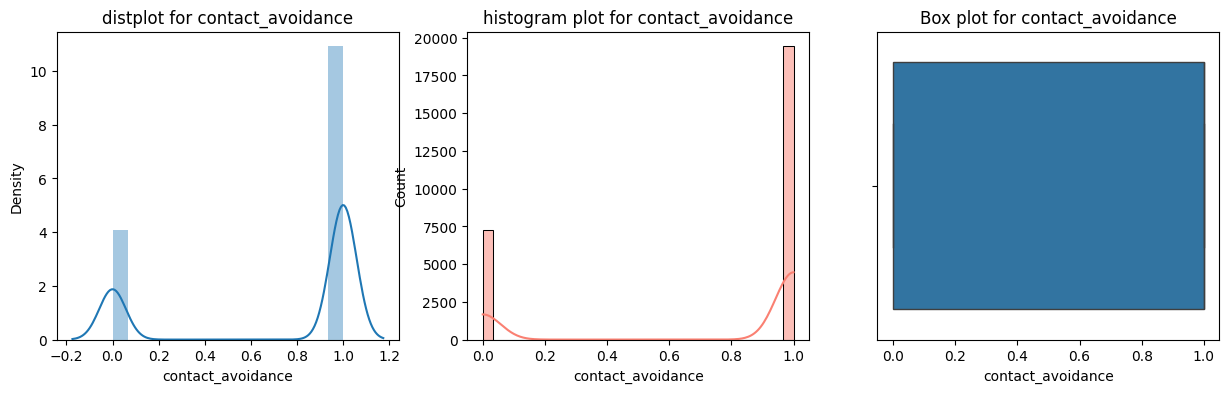

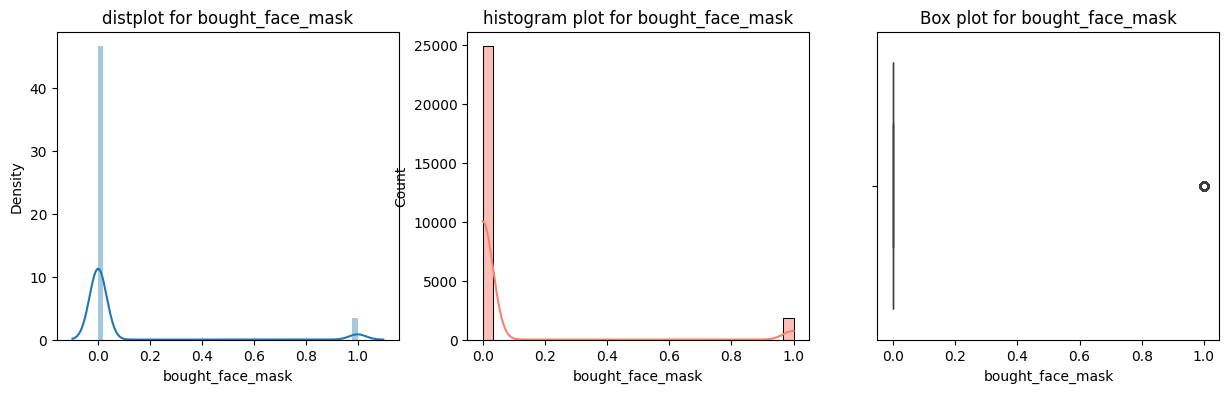

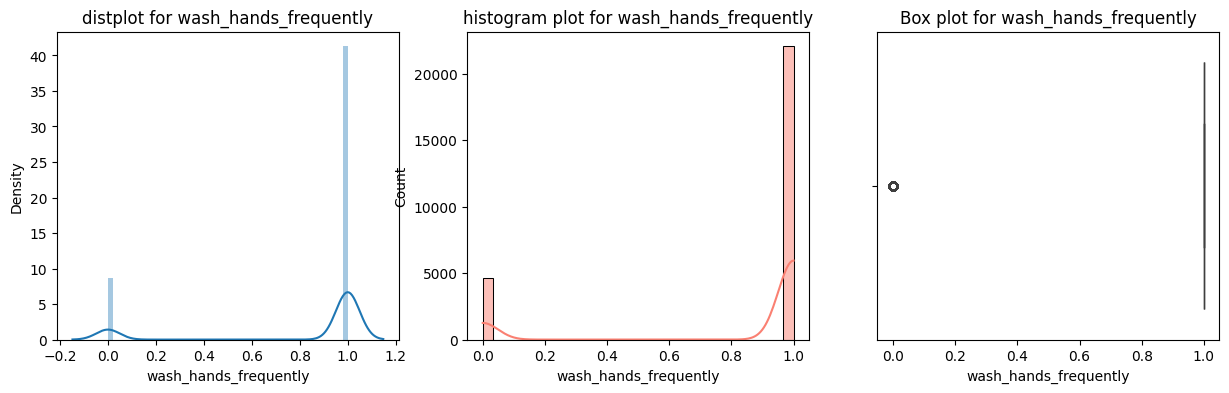

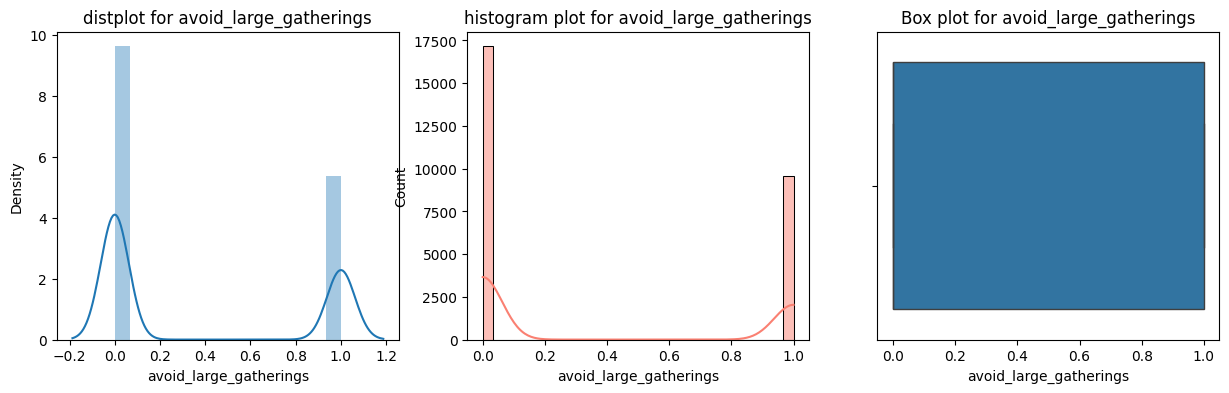

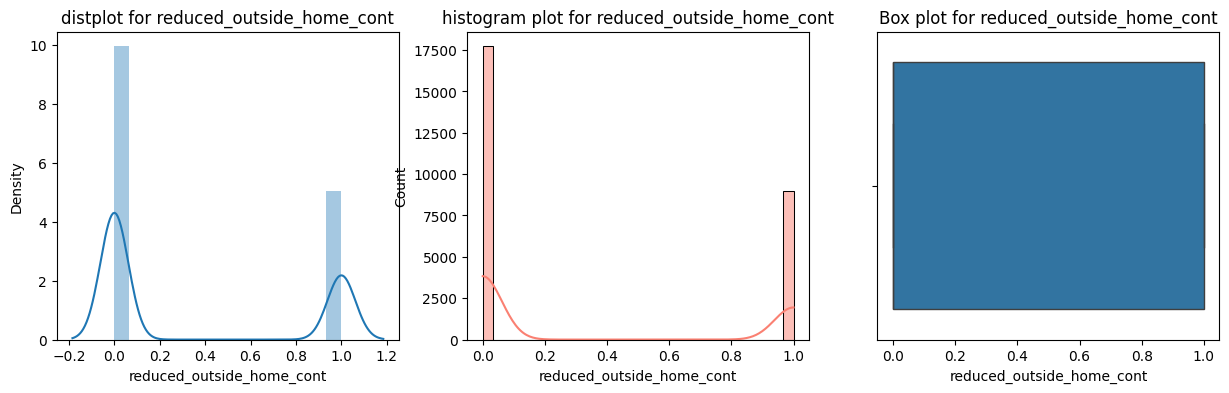

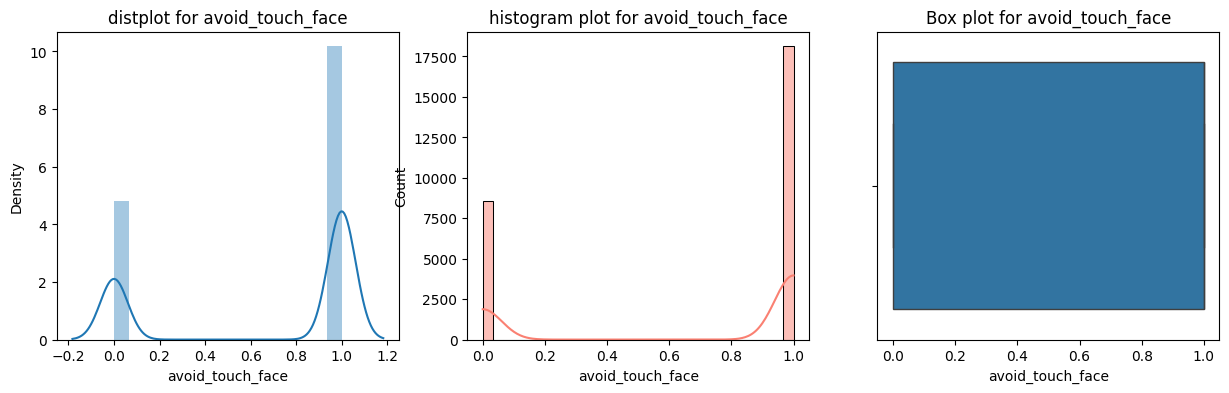

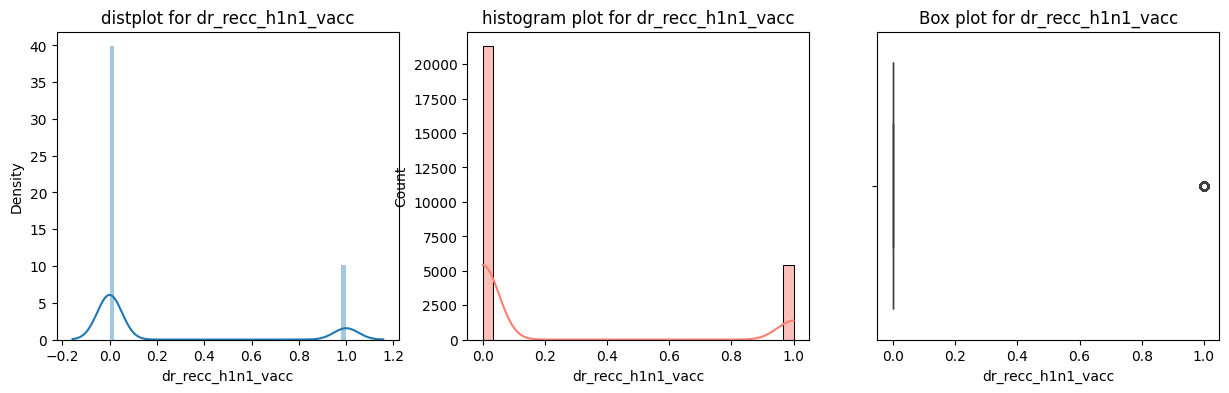

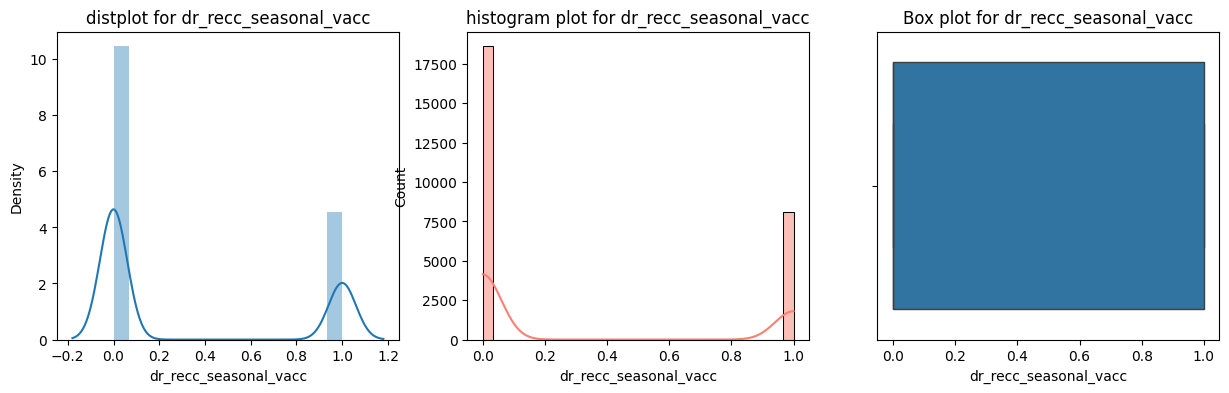

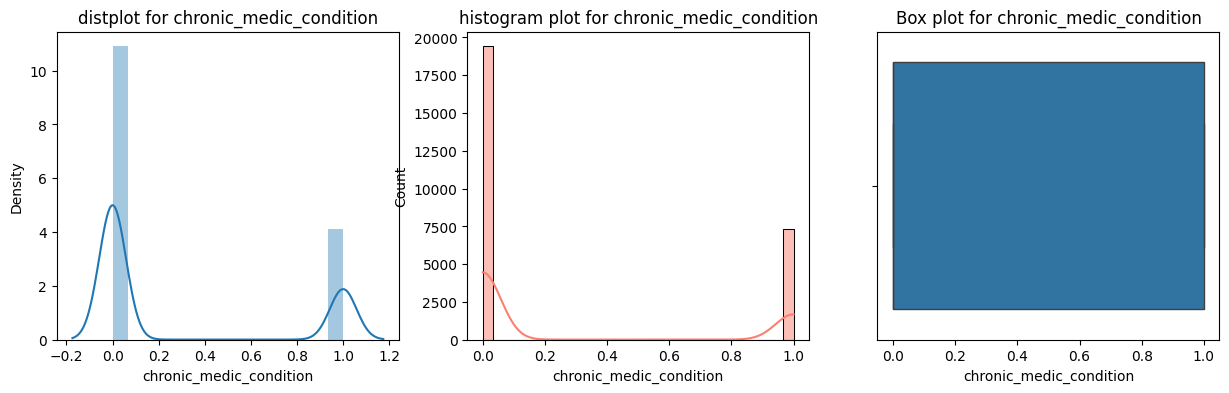

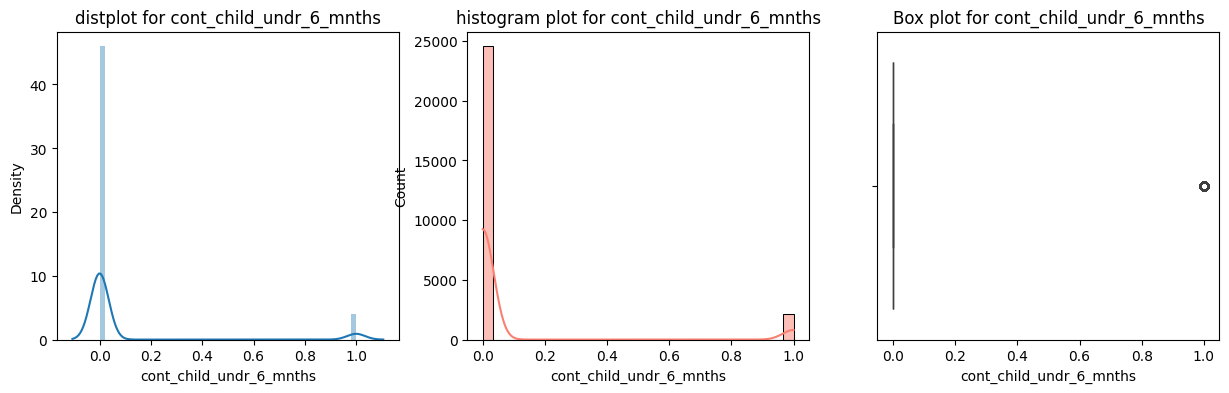

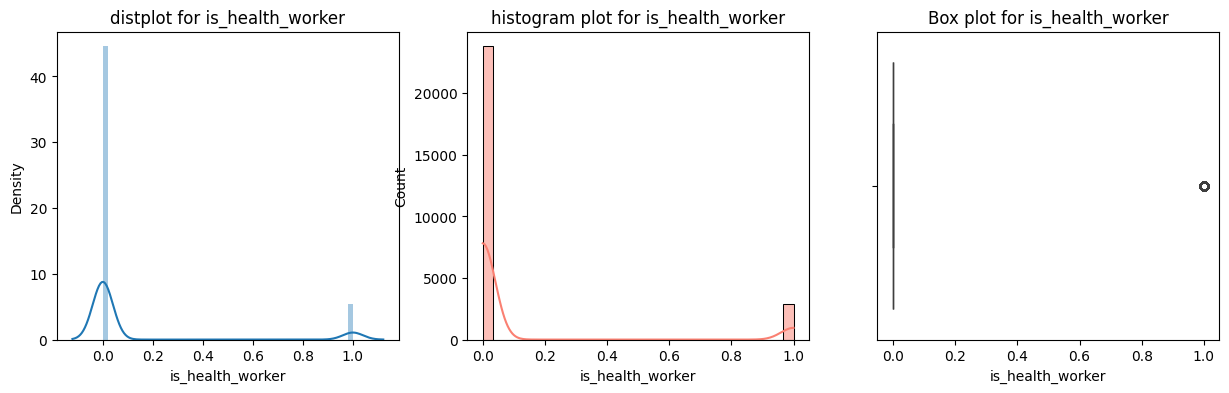

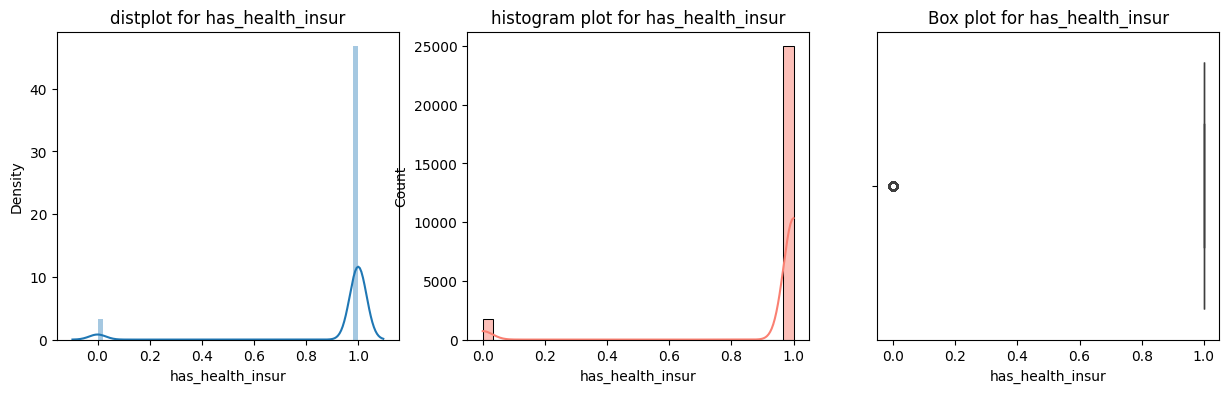

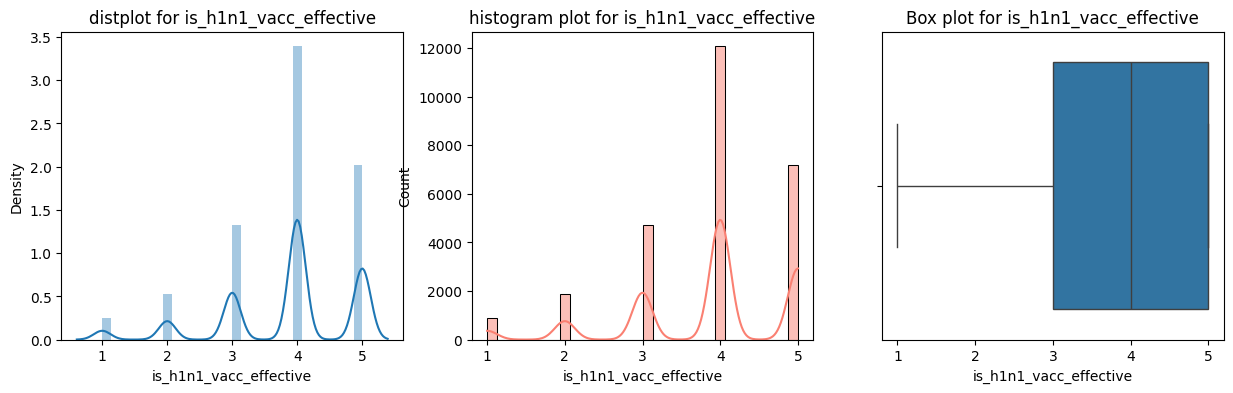

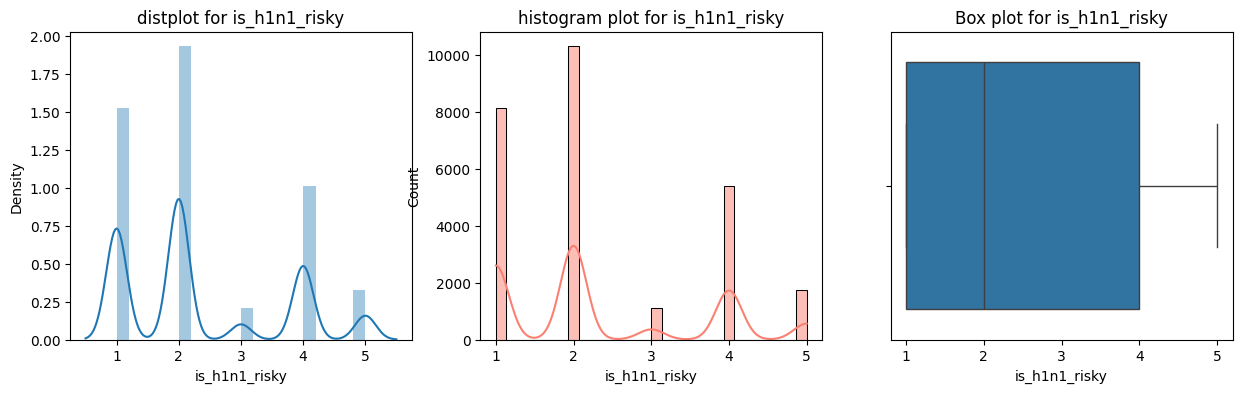

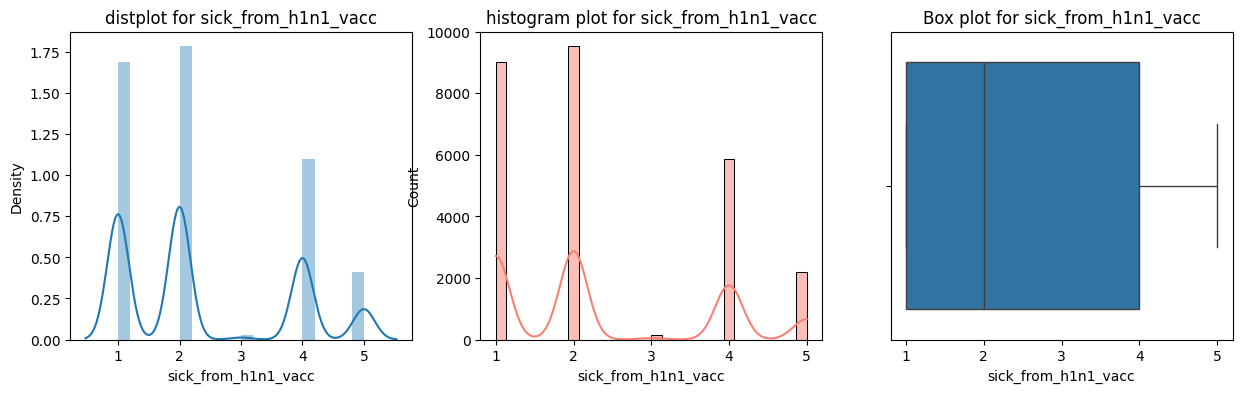

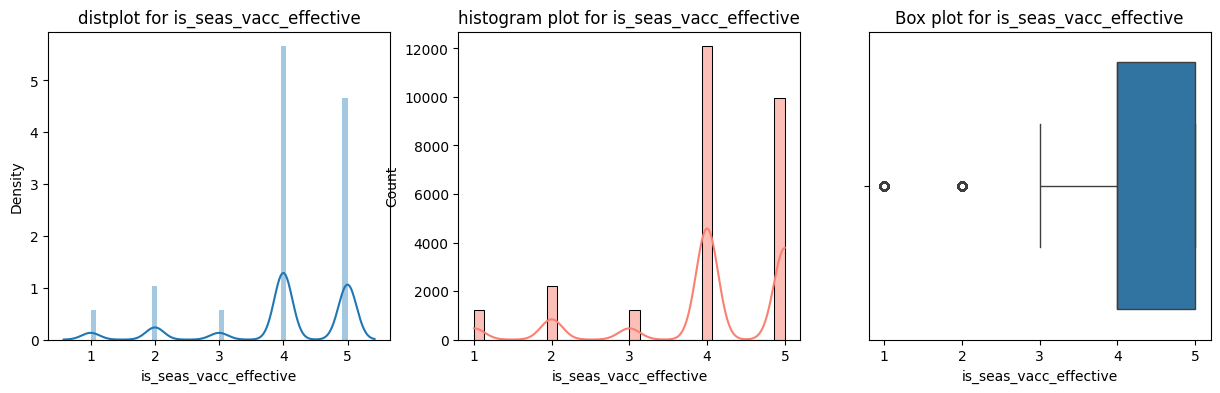

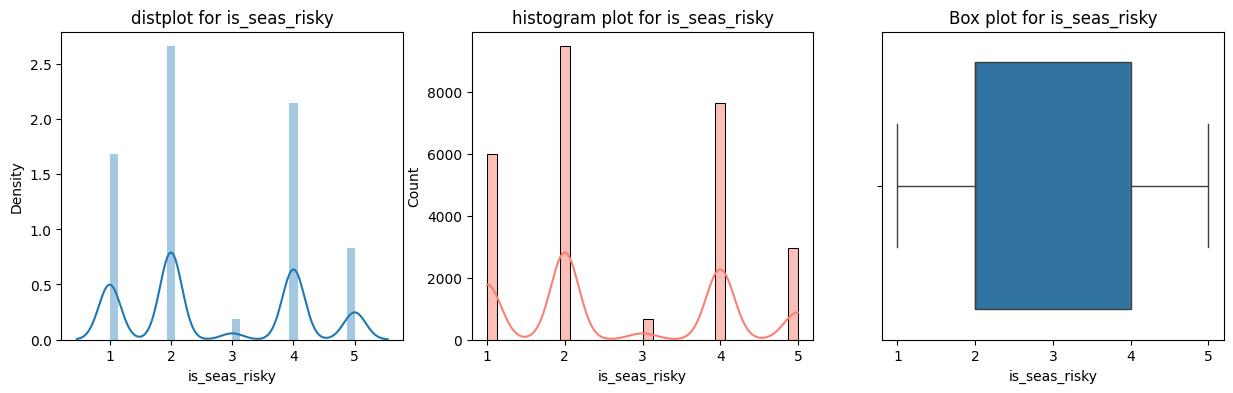

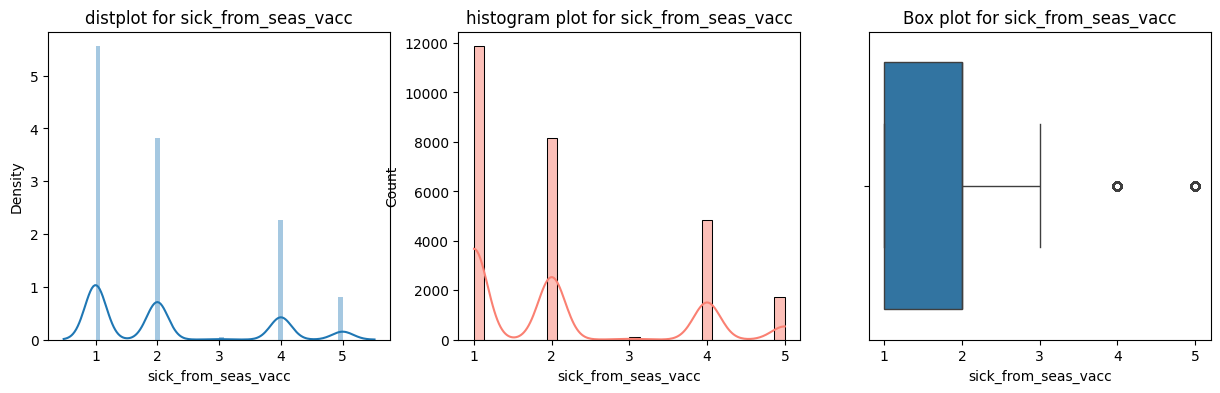

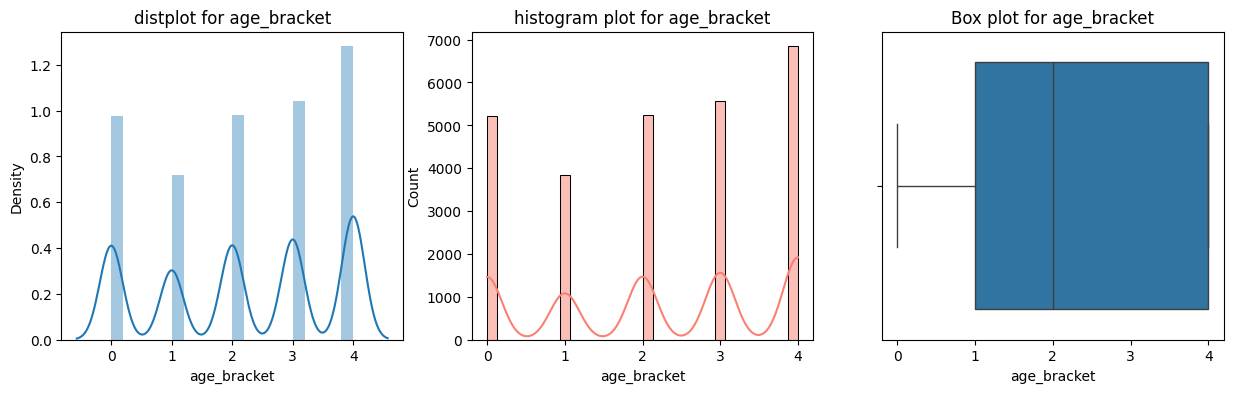

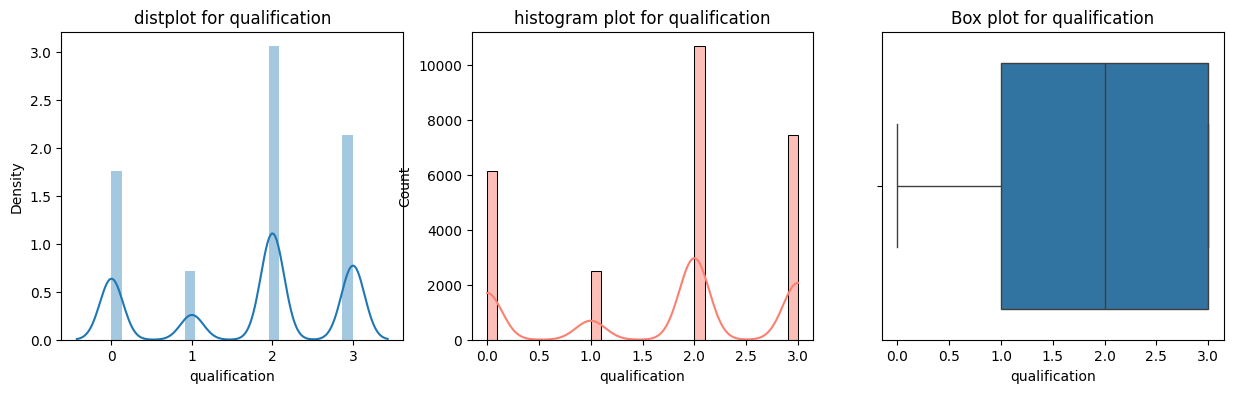

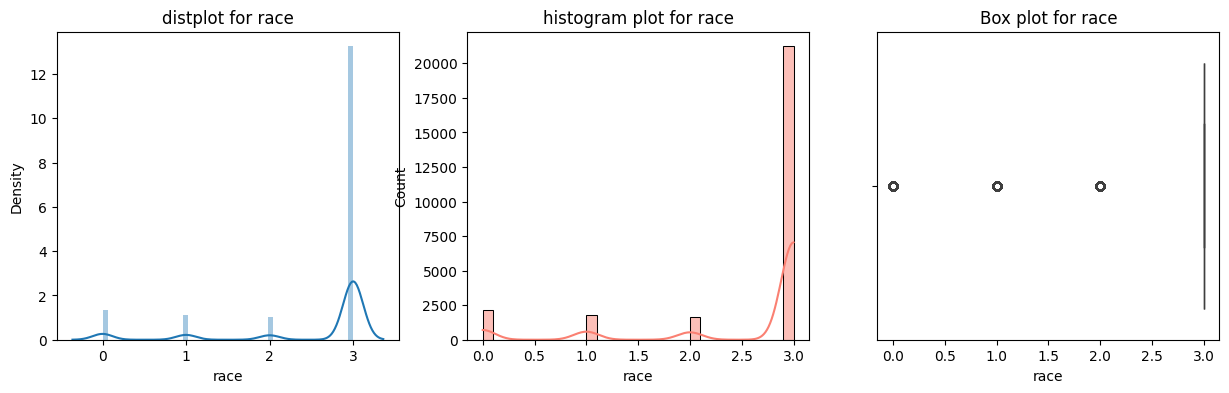

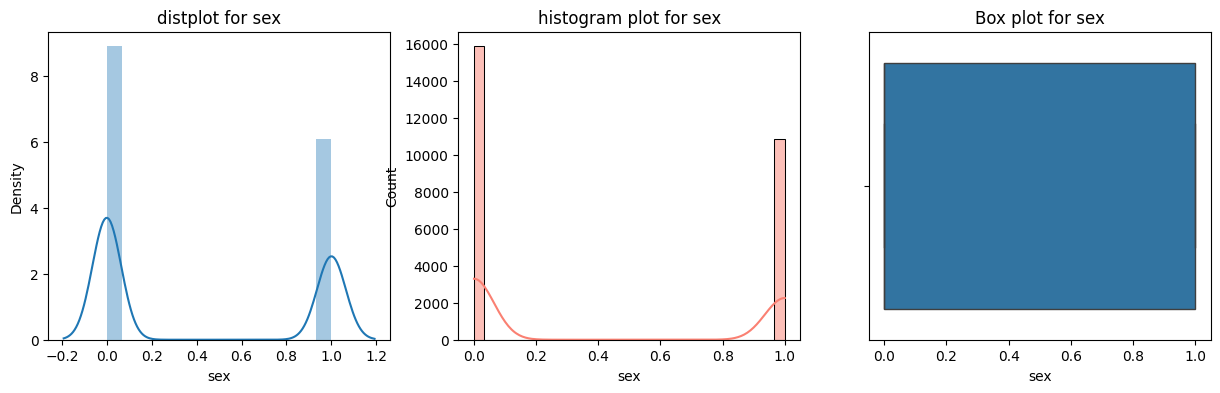

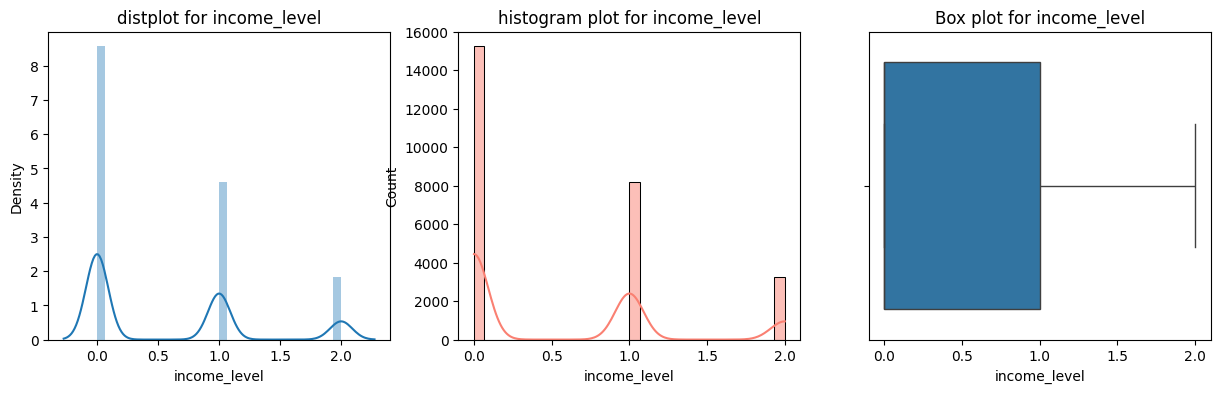

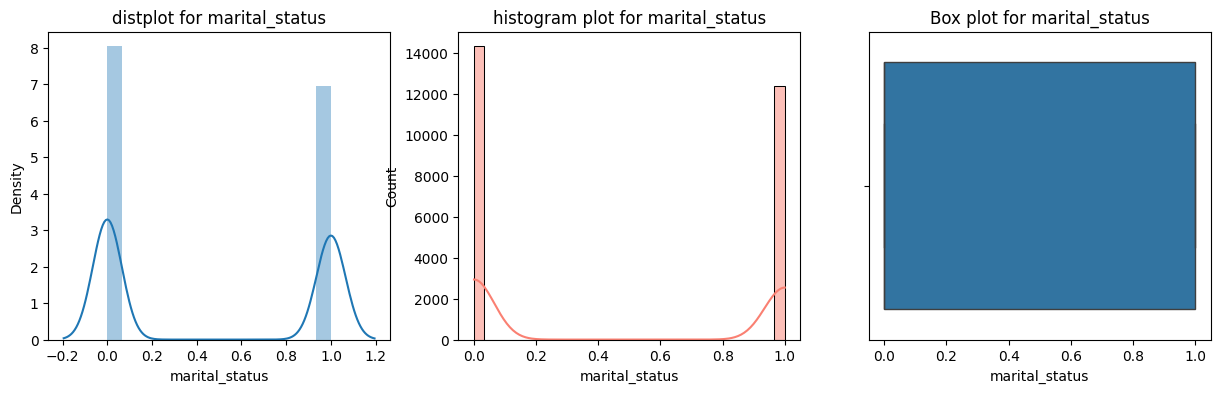

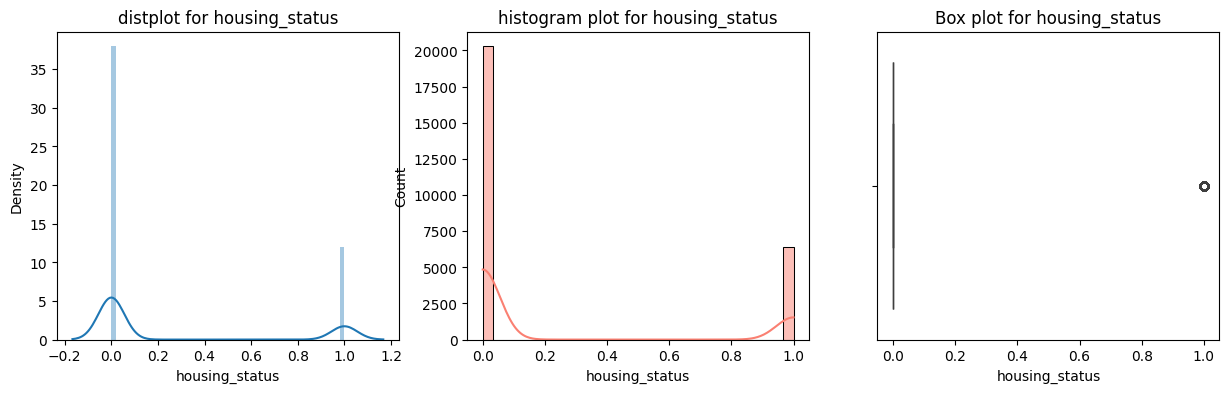

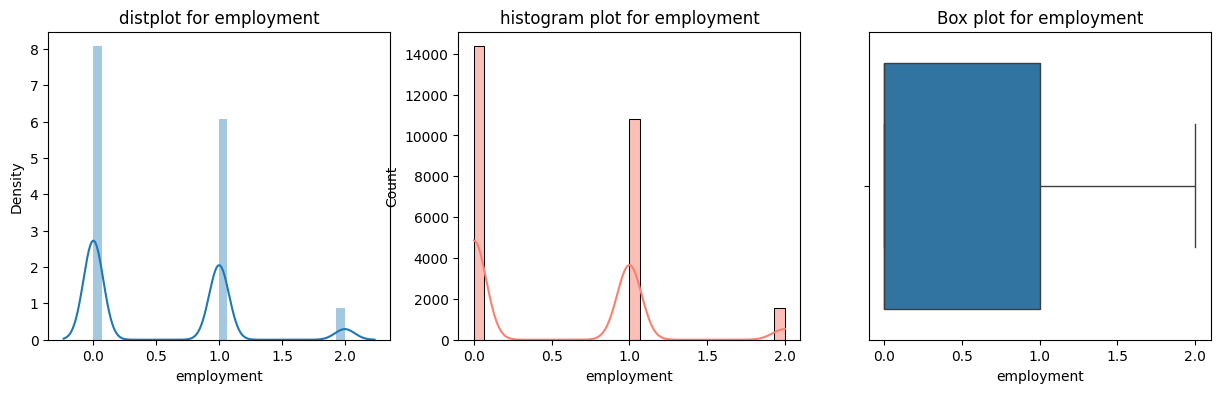

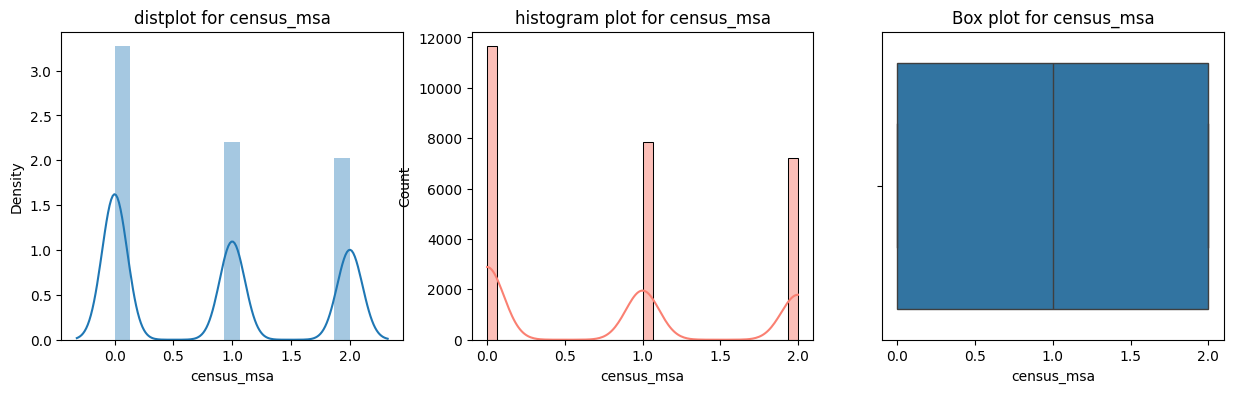

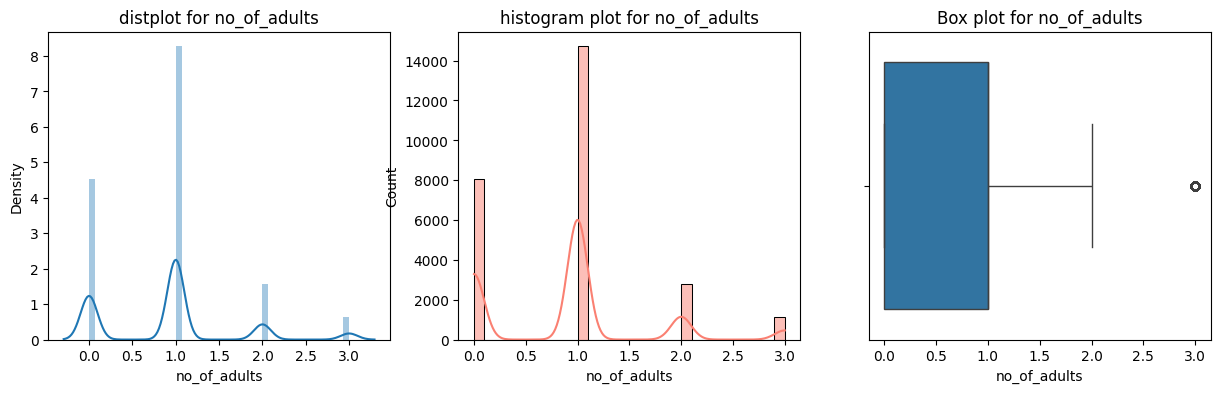

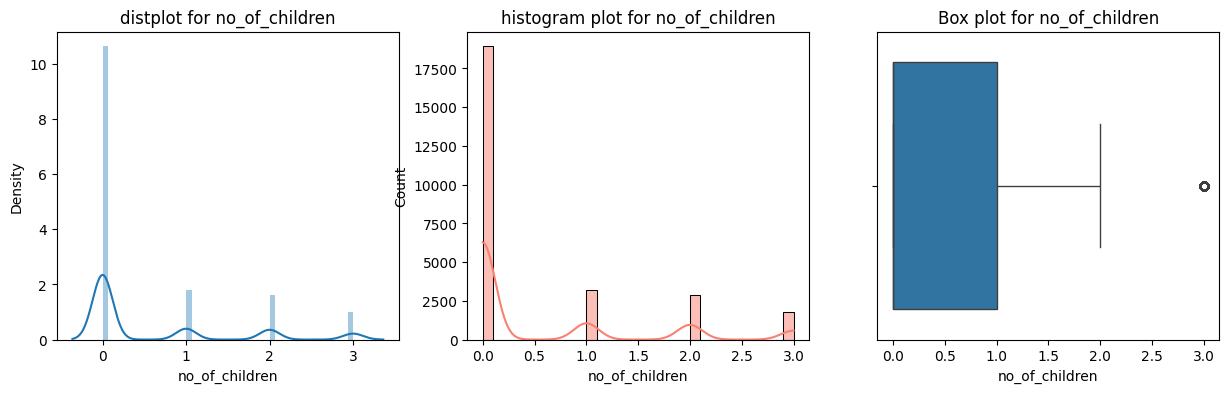

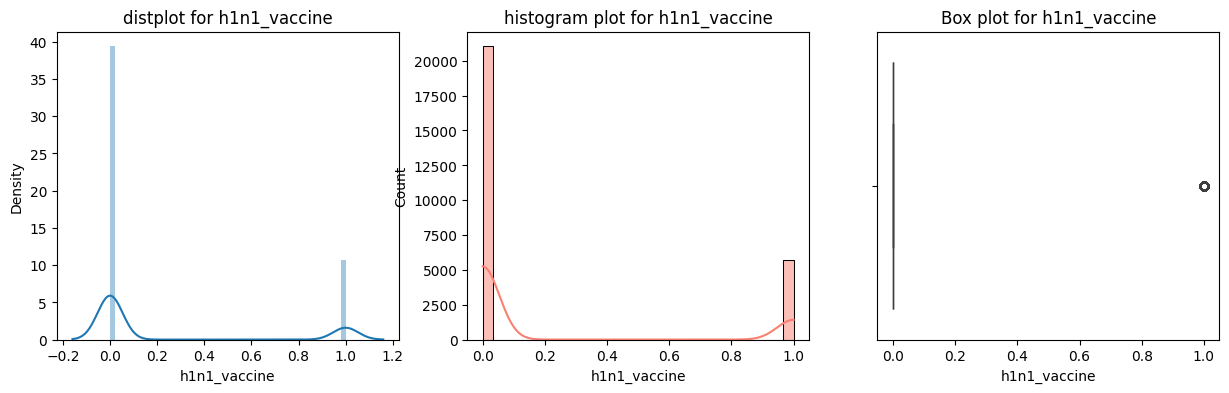

In [33]:
for i in df_final.columns:
    plot(df_final,i)

In [34]:
df_final.describe().T

count          mean          std  min     25%  \
unique_id                  26707.0  13353.000000  7709.791156  0.0  6676.5   
h1n1_worry                 26707.0      1.619800     0.909016  0.0     1.0   
h1n1_awareness             26707.0      1.261392     0.617047  0.0     1.0   
antiviral_medication       26707.0      0.048714     0.215273  0.0     0.0   
contact_avoidance          26707.0      0.727749     0.445127  0.0     0.0   
bought_face_mask           26707.0      0.068933     0.253345  0.0     0.0   
wash_hands_frequently      26707.0      0.825888     0.379213  0.0     1.0   
avoid_large_gatherings     26707.0      0.357472     0.479264  0.0     0.0   
reduced_outside_home_cont  26707.0      0.336279     0.472444  0.0     0.0   
avoid_touch_face           26707.0      0.678811     0.466942  0.0     0.0   
dr_recc_h1n1_vacc          26707.0      0.202494     0.401866  0.0     0.0   
dr_recc_seasonal_vacc      26707.0      0.303067     0.459592  0.0     0.0   
chronic_medic_condition    26707.0      0.272962     0.445490  0.0     0.0   
cont_child_undr_6_mnths    26707.0      0.080054     0.271382  0.0     0.0   
is_health_worker           26707.0      0.108548     0.311077  0.0     0.0   
has_health_insur           26707.0      0.934998     0.246533  0.0     1.0   
is_h1n1_vacc_effective     26707.0      3.852810     1.000195  1.0     3.0   
is_h1n1_risky              26707.0      2.337589     1.276825  1.0     1.0   
sick_from_h1n1_vacc        26707.0      2.352380     1.353339  1.0     1.0   
is_seas_vacc_effective     26707.0      4.025536     1.077131  1.0     4.0   
is_seas_risky              26707.0      2.705321     1.375216  1.0     2.0   
sick_from_seas_vacc        26707.0      2.115737     1.319585  1.0     1.0   
age_bracket                26707.0      2.186131     1.457320  0.0     1.0   
qualification              26707.0      1.727150     1.101675  0.0     1.0   
race                       26707.0      2.570300     0.923226  0.0     3.0   
sex                        26707.0      0.406223     0.491136  0.0     0.0   
income_level               26707.0      0.550754     0.700535  0.0     0.0   
marital_status             26707.0      0.464111     0.498720  0.0     0.0   
housing_status             26707.0      0.240499     0.427394  0.0     0.0   
employment                 26707.0      0.519939     0.604042  0.0     0.0   
census_msa                 26707.0      0.833489     0.823313  0.0     0.0   
no_of_adults               26707.0      0.887558     0.749980  0.0     0.0   
no_of_children             26707.0      0.529599     0.925264  0.0     0.0   
h1n1_vaccine               26707.0      0.212454     0.409052  0.0     0.0   

                               50%      75%      max  
unique_id                  13353.0  20029.5  26706.0  
h1n1_worry                     2.0      2.0      3.0  
h1n1_awareness                 1.0      2.0      2.0  
antiviral_medication           0.0      0.0      1.0  
contact_avoidance              1.0      1.0      1.0  
bought_face_mask               0.0      0.0      1.0  
wash_hands_frequently          1.0      1.0      1.0  
avoid_large_gatherings         0.0      1.0      1.0  
reduced_outside_home_cont      0.0      1.0      1.0  
avoid_touch_face               1.0      1.0      1.0  
dr_recc_h1n1_vacc              0.0      0.0      1.0  
dr_recc_seasonal_vacc          0.0      1.0      1.0  
chronic_medic_condition        0.0      1.0      1.0  
cont_child_undr_6_mnths        0.0      0.0      1.0  
is_health_worker               0.0      0.0      1.0  
has_health_insur               1.0      1.0      1.0  
is_h1n1_vacc_effective         4.0      5.0      5.0  
is_h1n1_risky                  2.0      4.0      5.0  
sick_from_h1n1_vacc            2.0      4.0      5.0  
is_seas_vacc_effective         4.0      5.0      5.0  
is_seas_risky                  2.0      4.0      5.0  
sick_from_seas_vacc            2.0      2.0      5.0  
age_bracket                    2.

In [35]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [37]:
for j in df_final.columns:
    outlier(df_final,j)

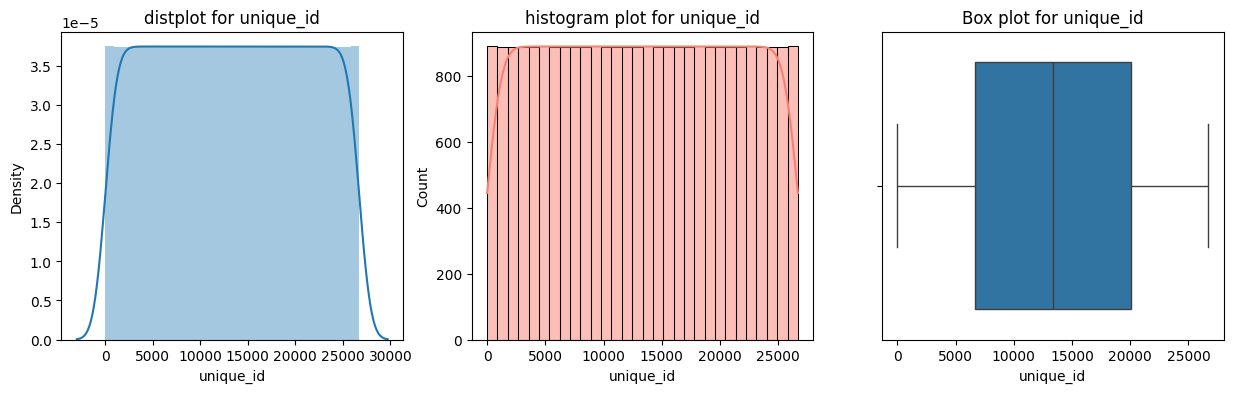

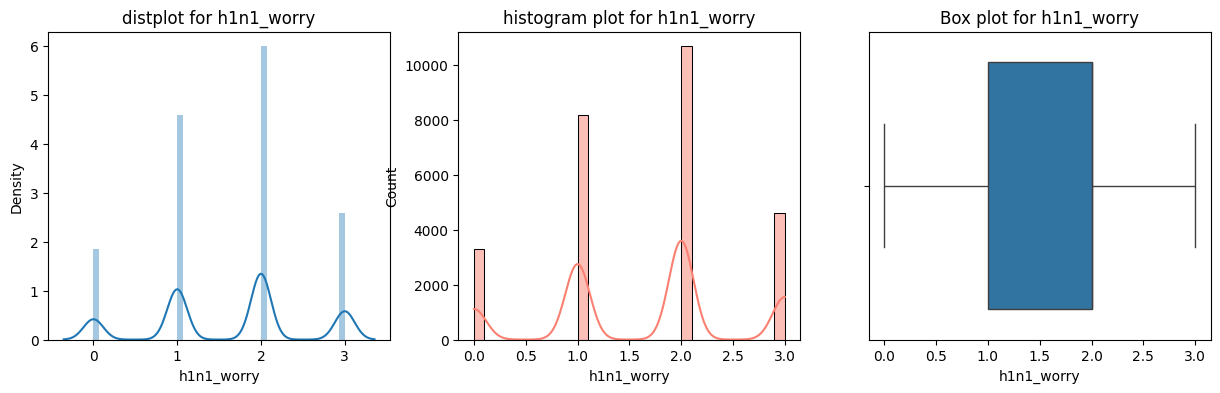

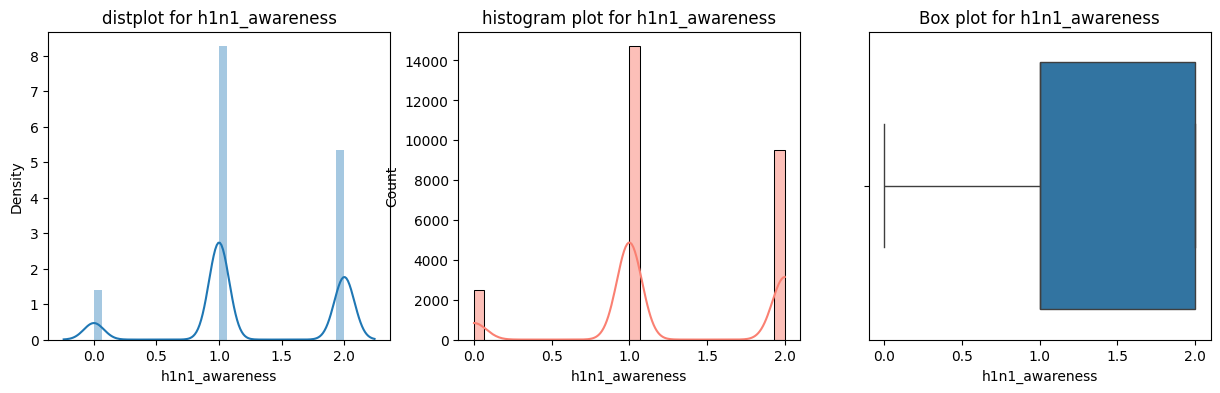

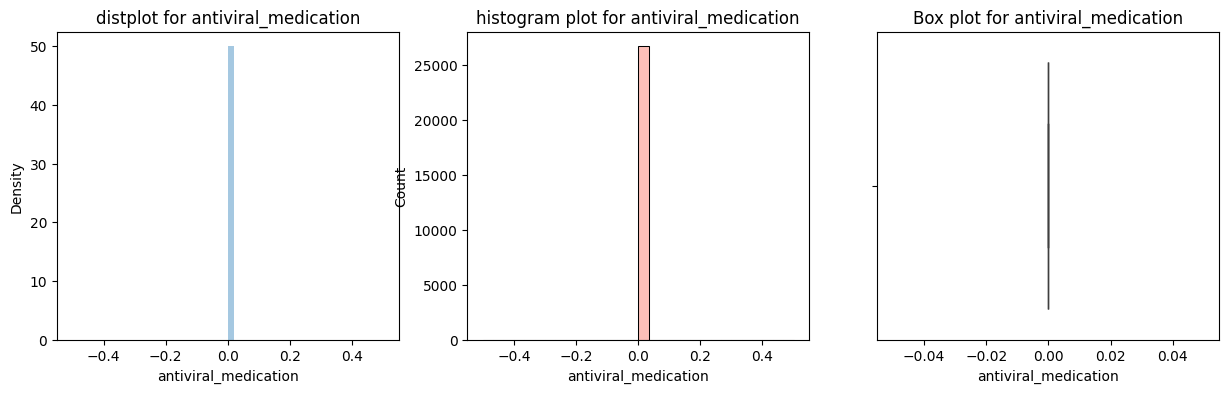

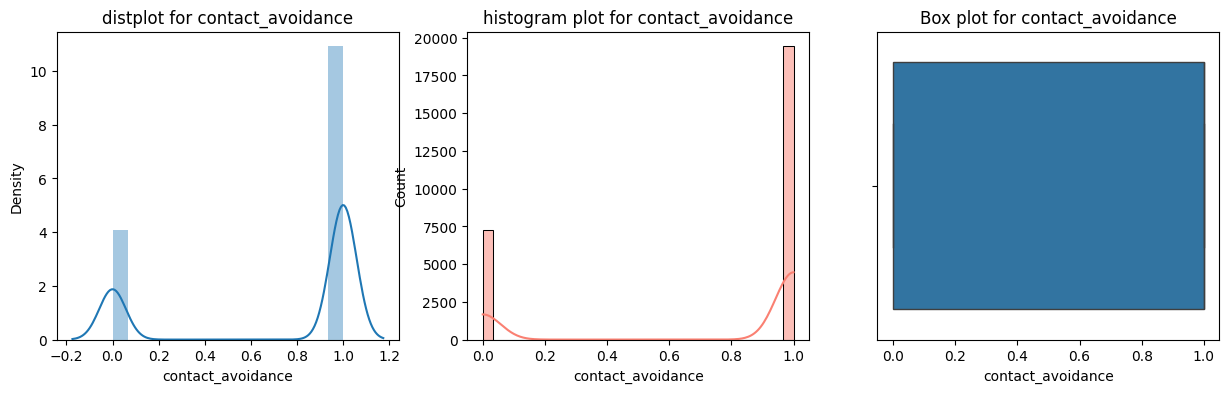

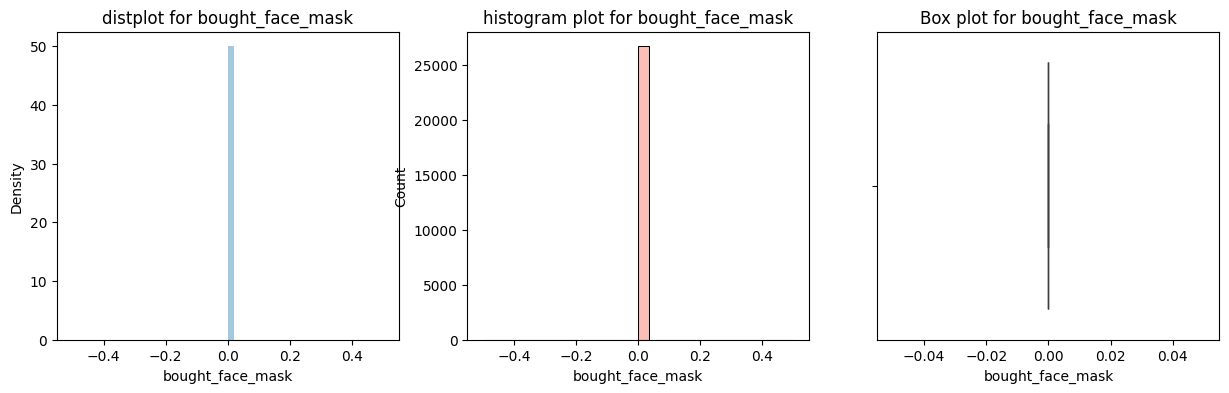

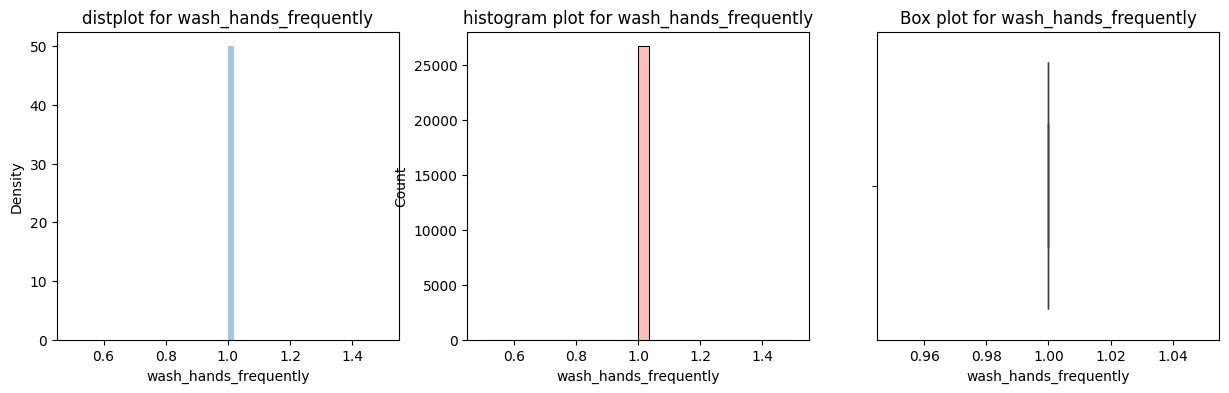

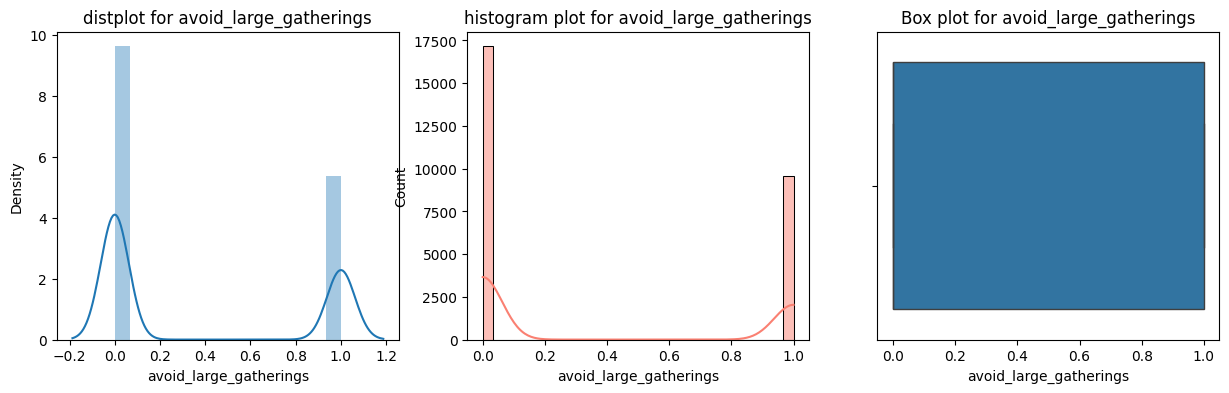

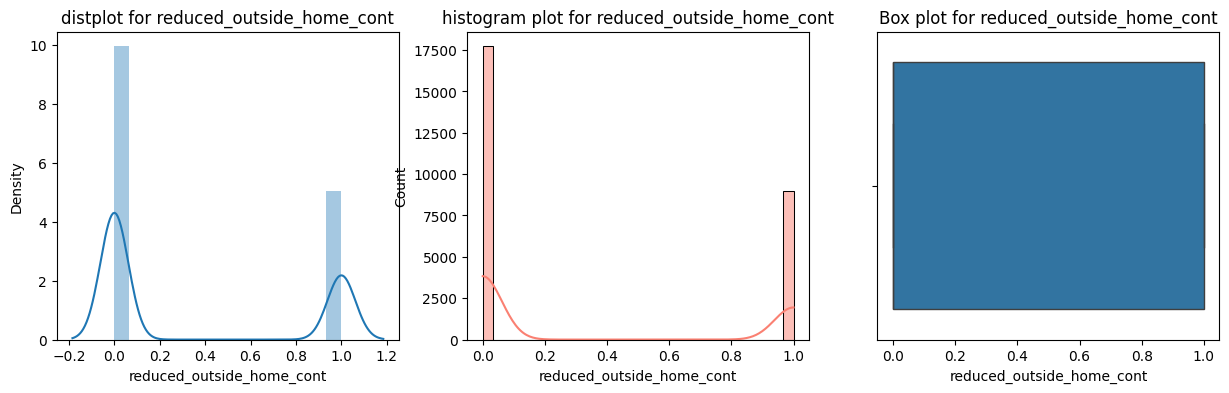

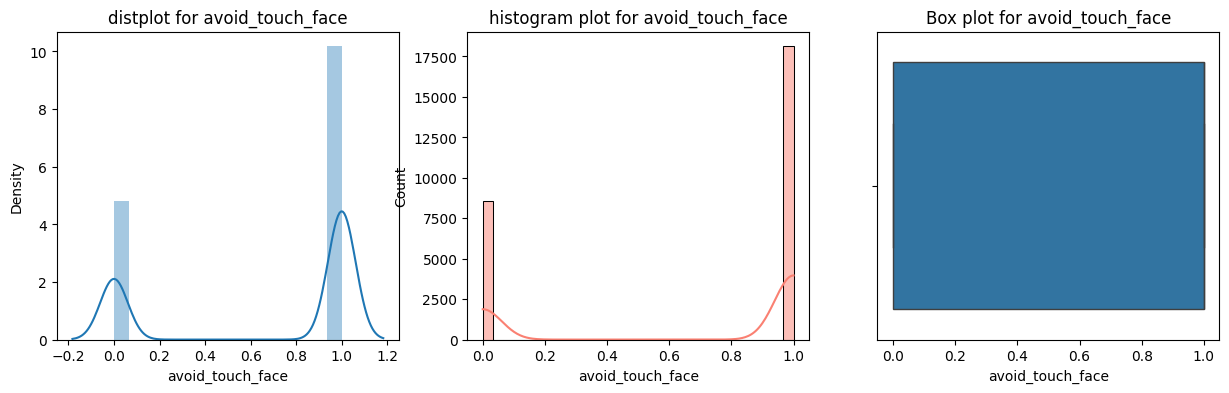

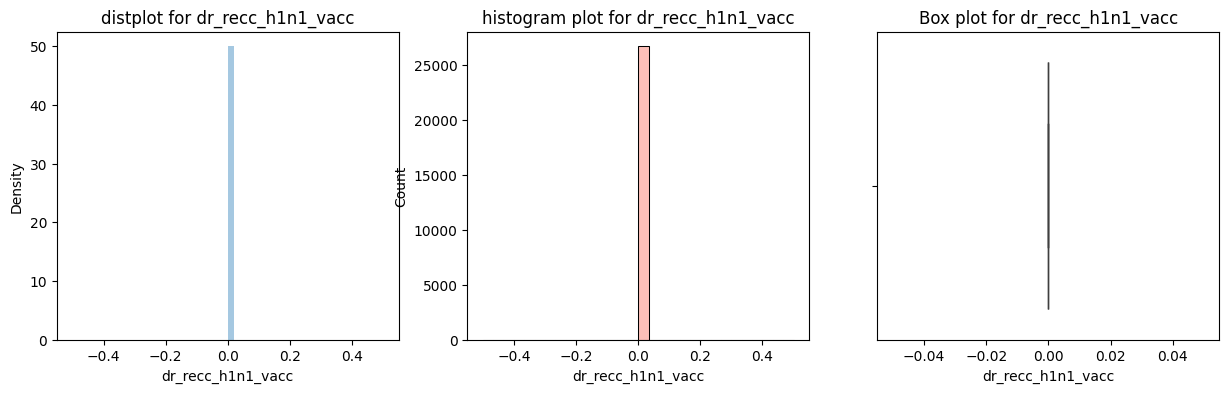

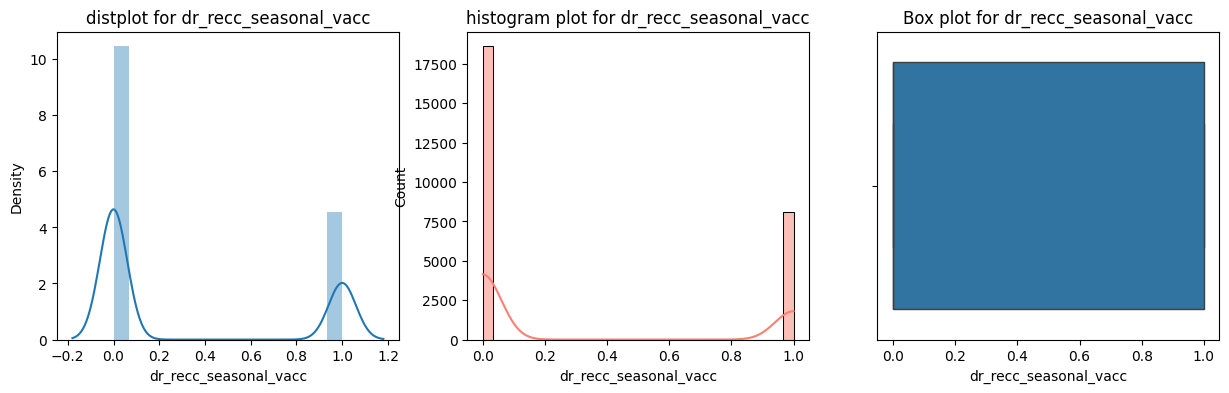

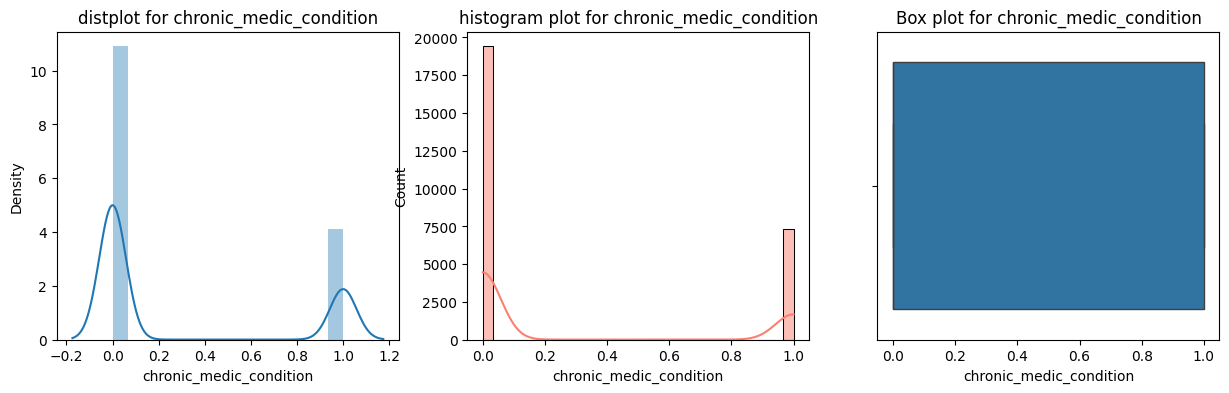

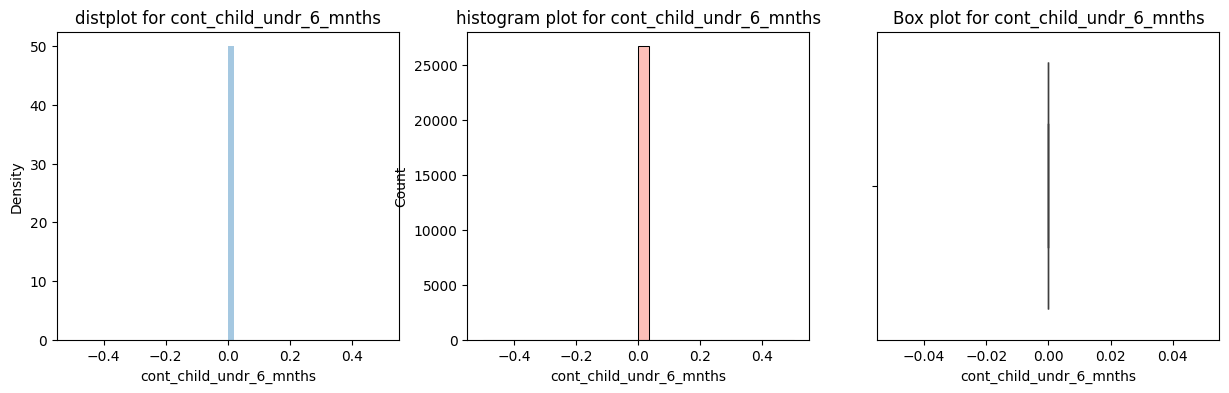

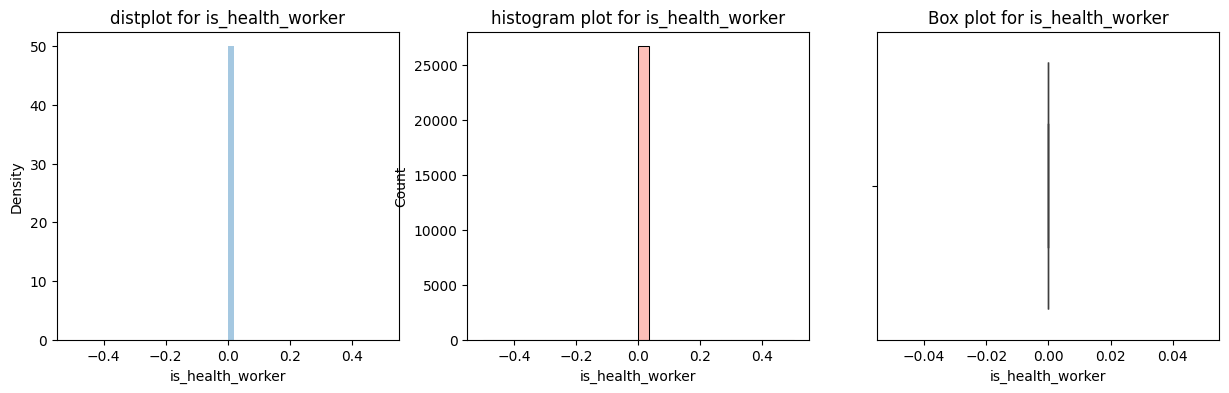

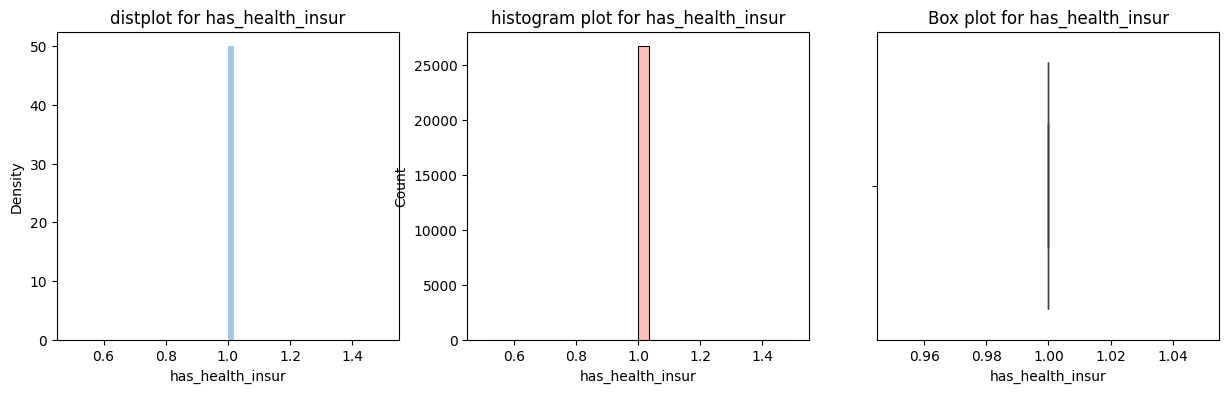

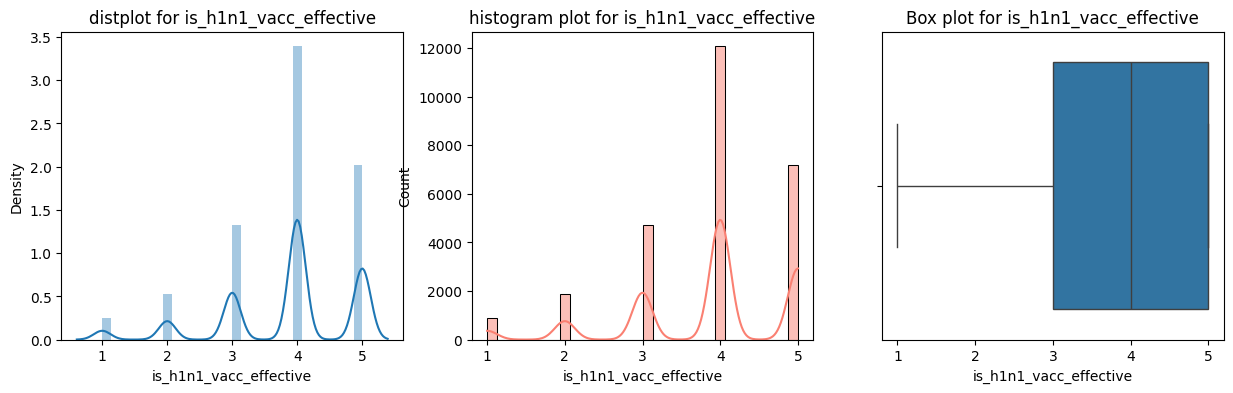

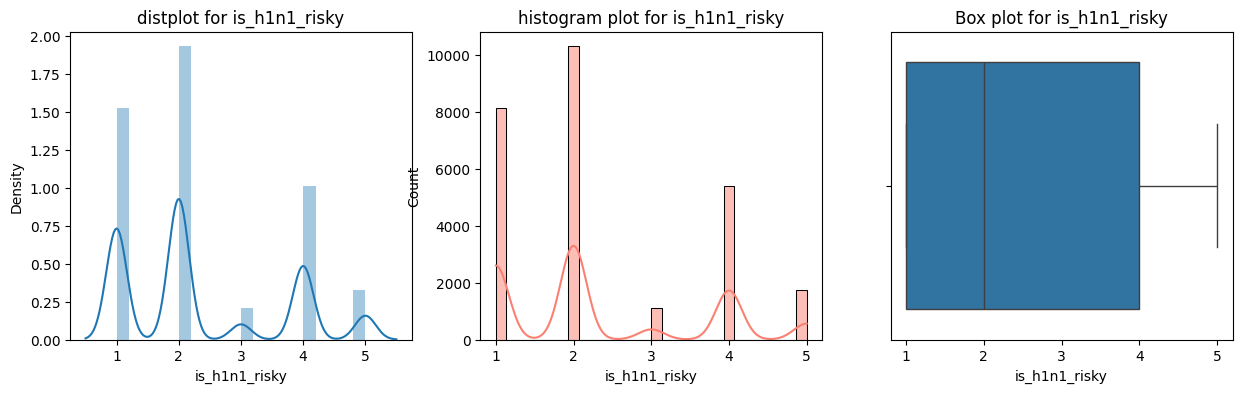

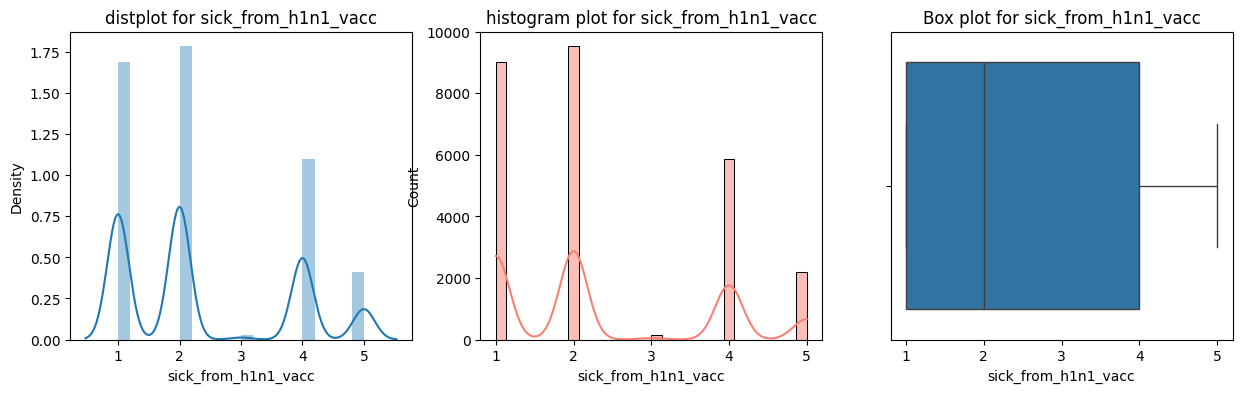

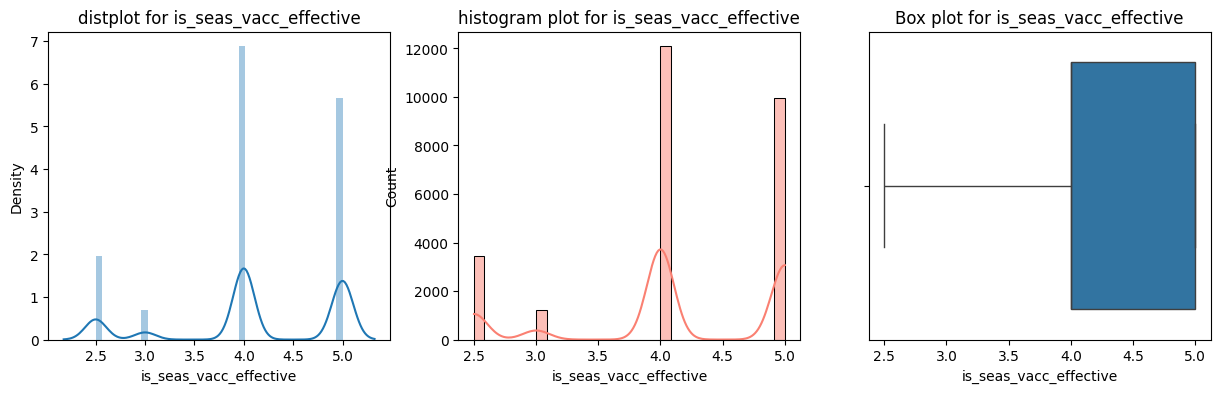

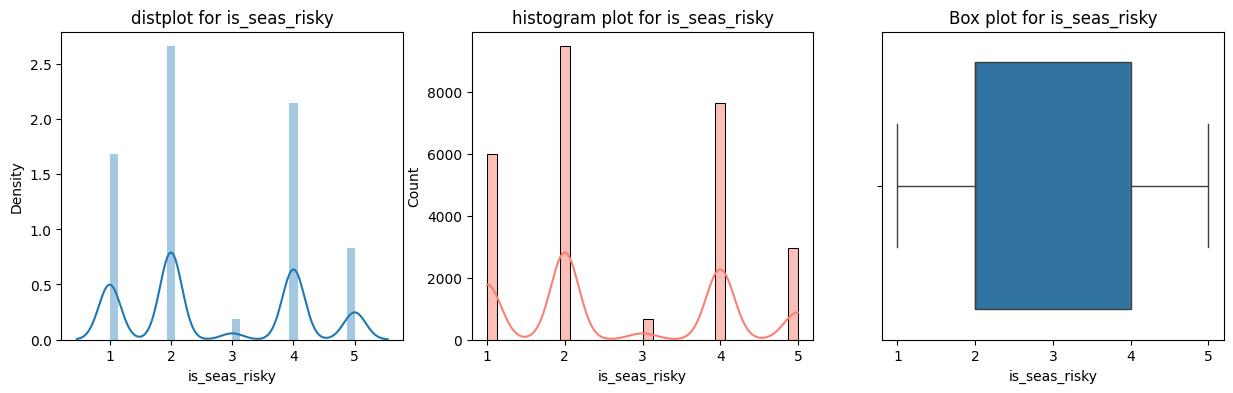

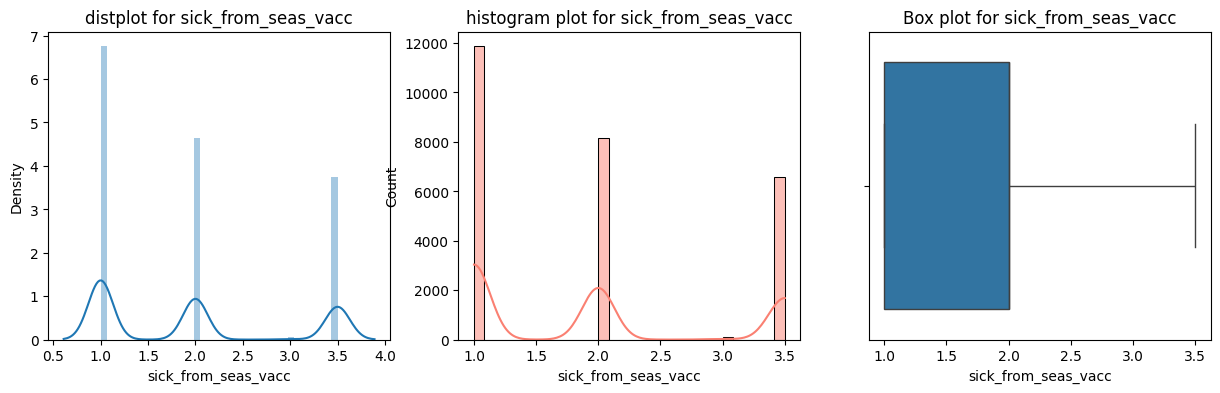

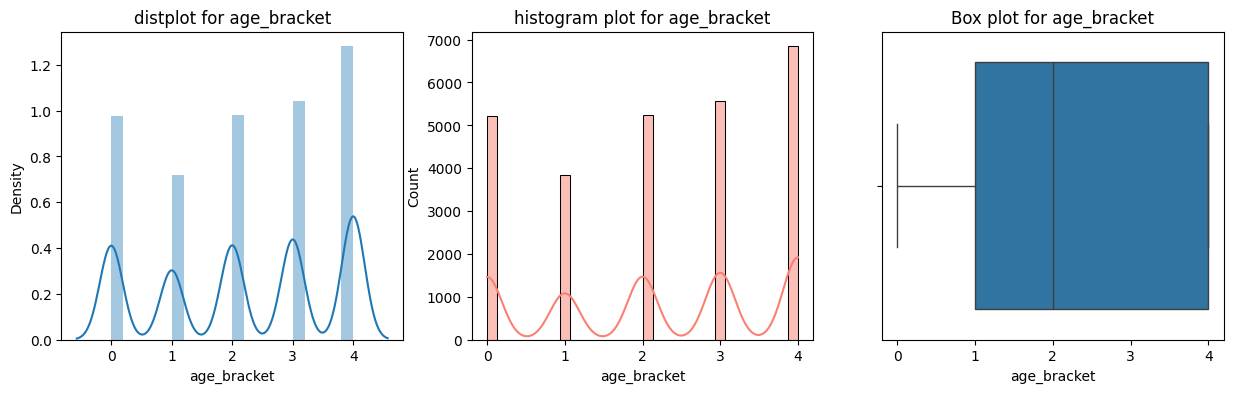

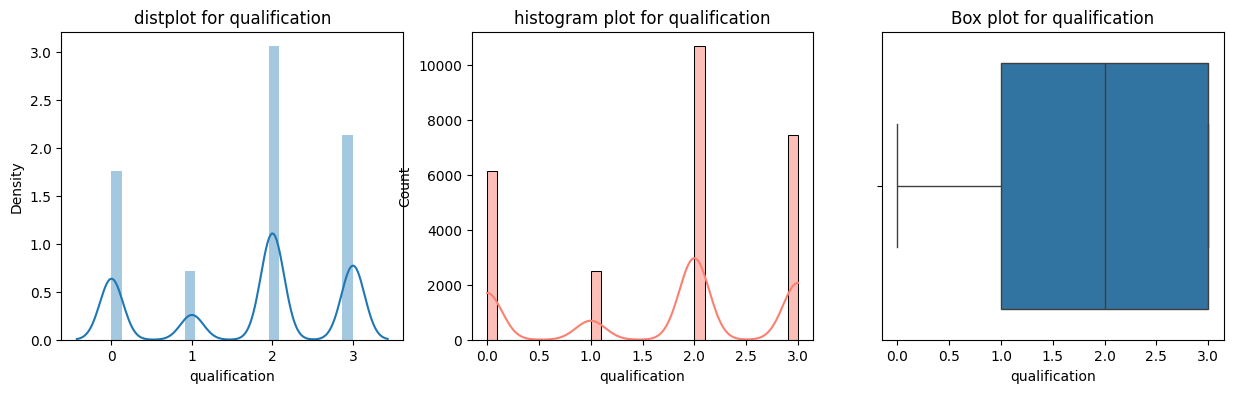

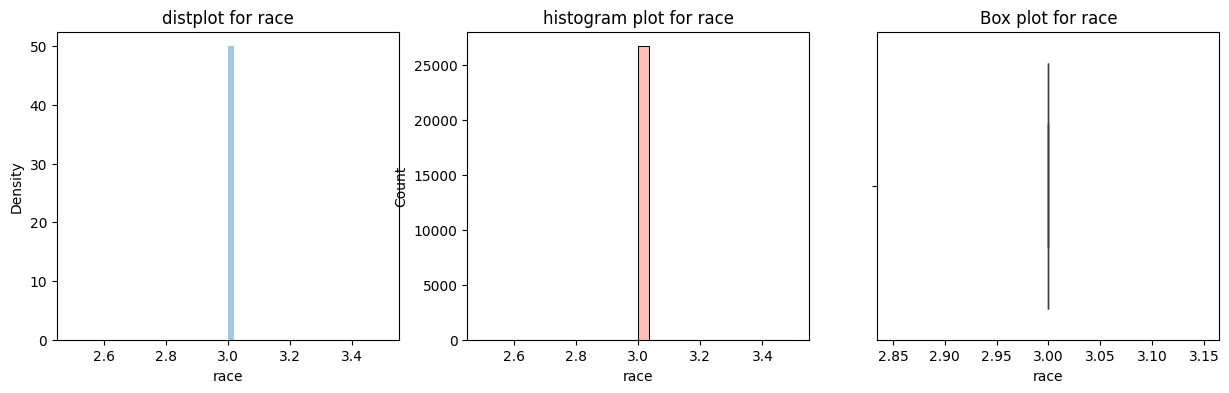

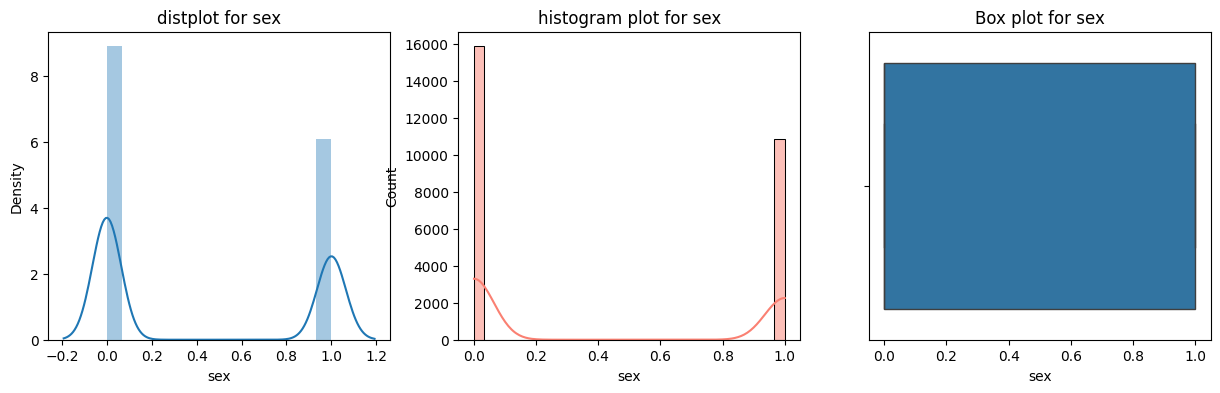

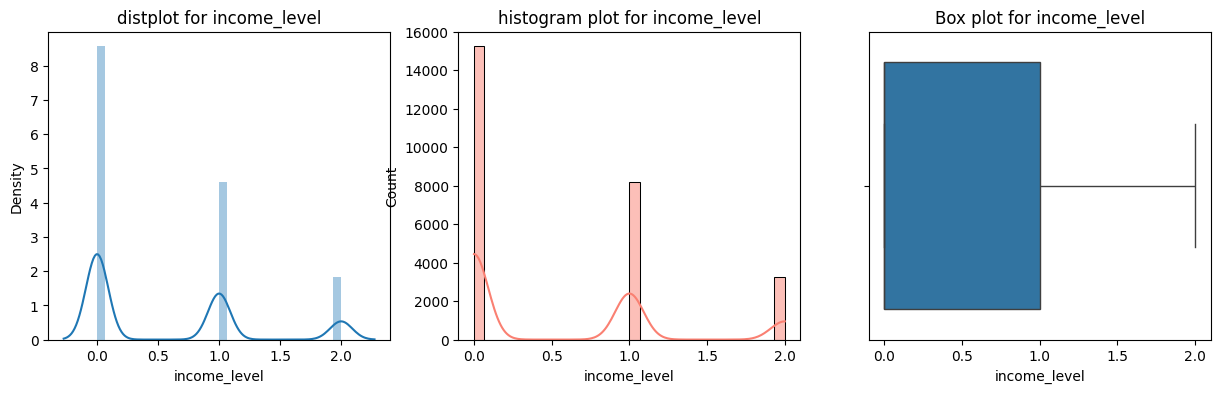

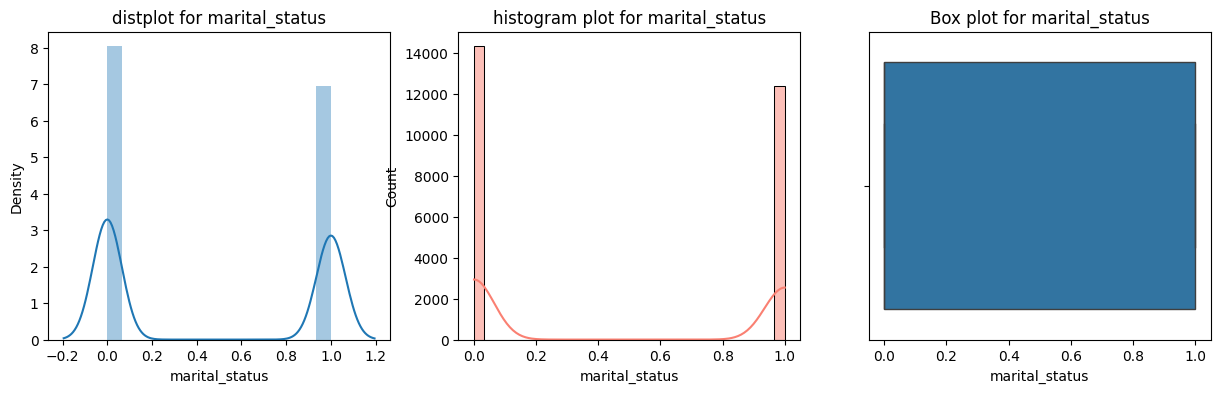

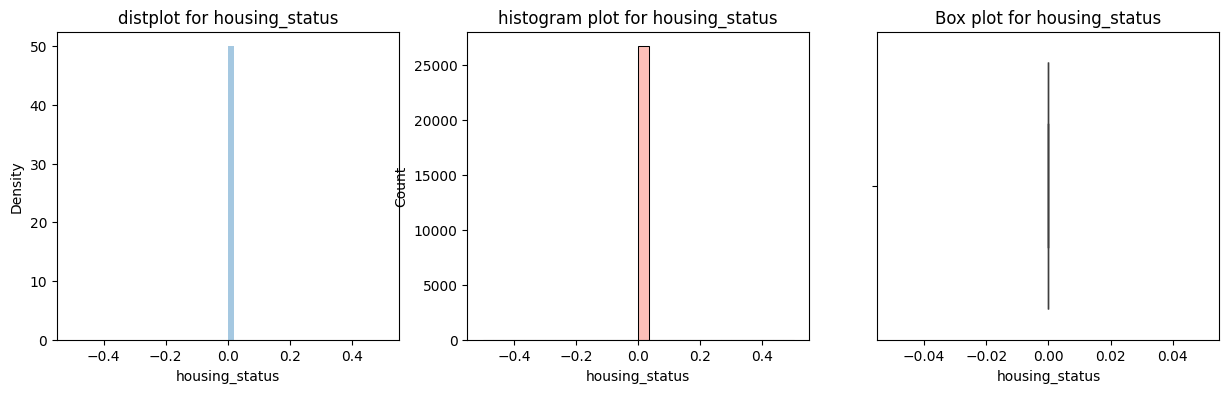

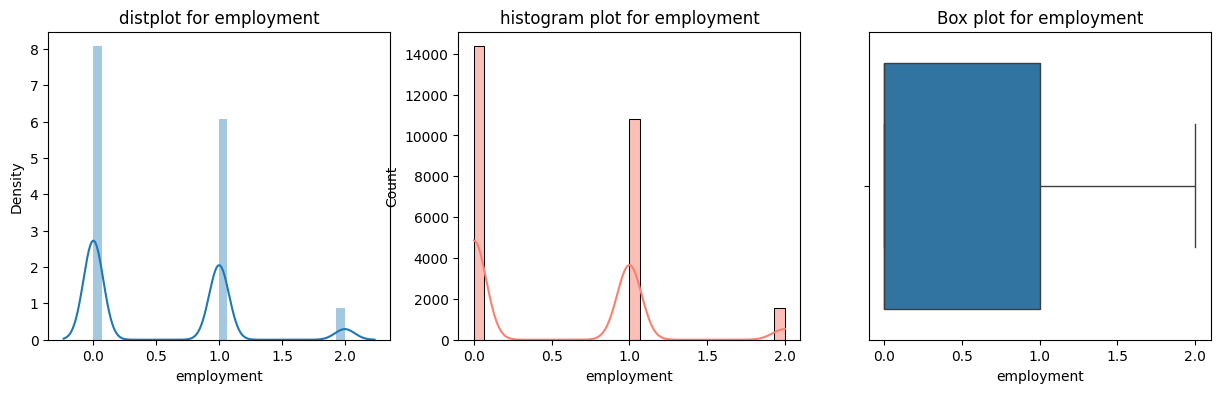

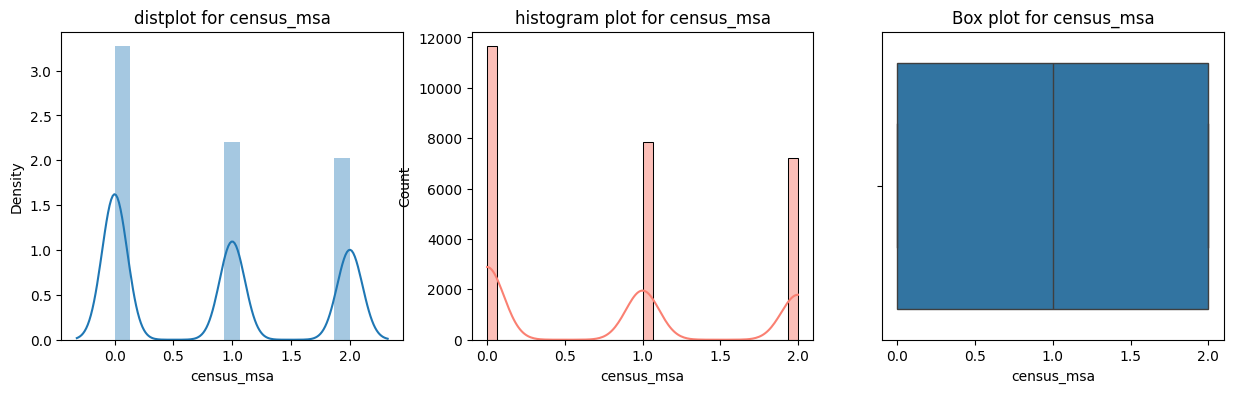

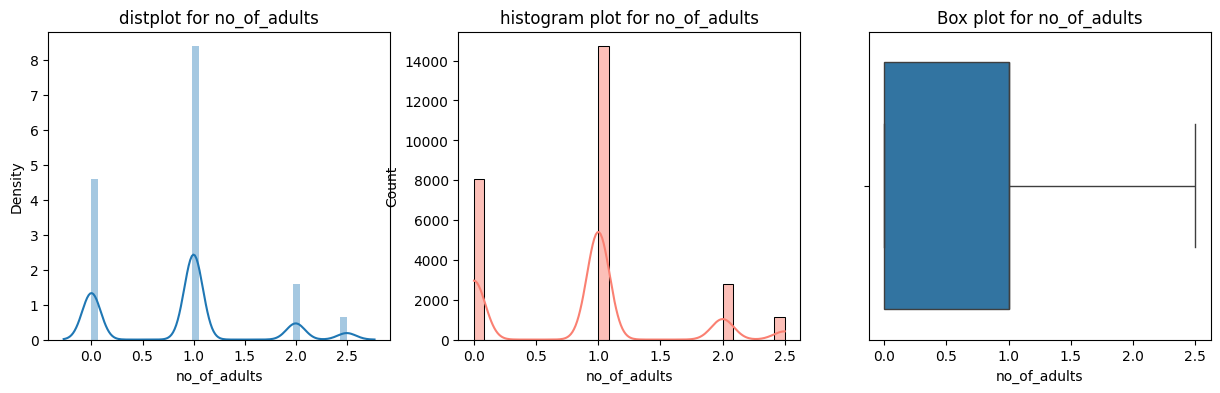

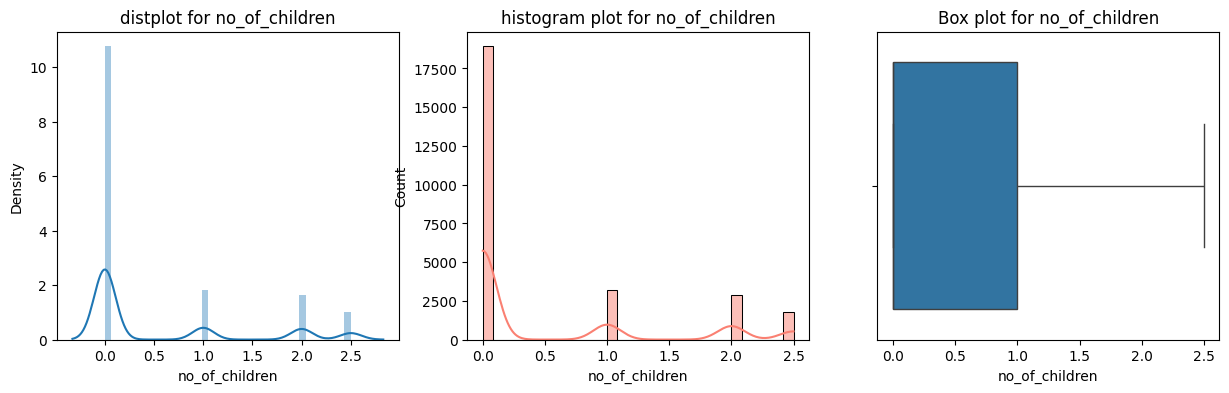

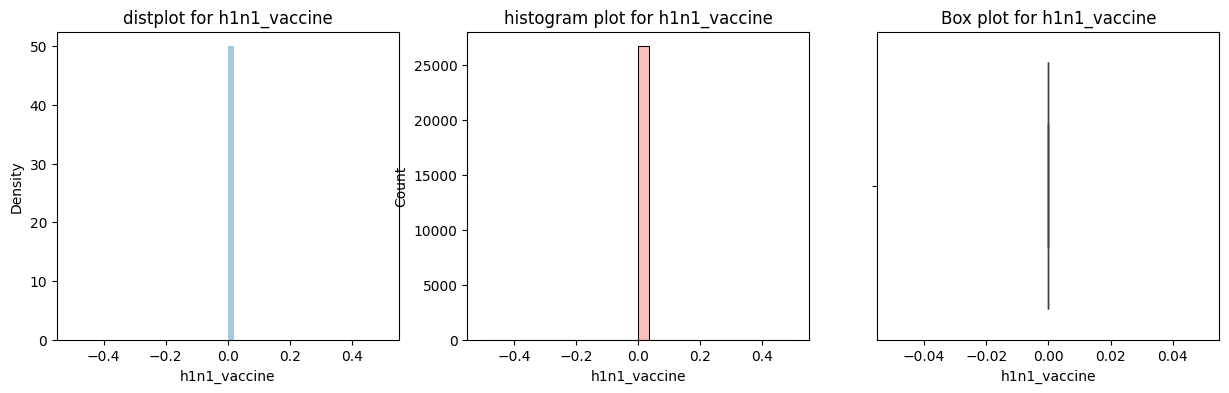

In [38]:
for k in df_final.columns:
    plot(df_final,k)

In [127]:
df_final.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# Classification Method - Predict

In [149]:
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek

import pickle

In [142]:
x= df_final.drop(columns=['unique_id','h1n1_vaccine'])
y= df_final["h1n1_vaccine"]

In [143]:
x.shape,y.shape

((26707, 32), (26707,))

In [150]:
x_new,y_new= SMOTETomek().fit_resample(x,y)

In [151]:
x_new.shape,y_new.shape

((41462, 32), (41462,))

In [144]:
# find the best algorithm for the classification prediction

def accuracy_checking(x_data, y_data, algorithm):
  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.3, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics

In [146]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 0.9998395207018295, 'Accuracy_Test': 0.7486584300511668}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 0.9998395207018295, 'Accuracy_Test': 0.8341445151628604}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 0.9998395207018295, 'Accuracy_Test': 0.8317733682765506}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8356691986733711, 'Accuracy_Test': 0.8360164732309996}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8429977532898256, 'Accuracy_Test': 0.8391364033445651}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9213651438964373, 'Accuracy_Test': 0.8340197179583178}


In [152]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 0.9996899011129105, 'Accuracy_Test': 0.7766701503336281}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 0.9996899011129105, 'Accuracy_Test': 0.8618056113835517}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 0.9996899011129105, 'Accuracy_Test': 0.8694428812605515}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7715604865106984, 'Accuracy_Test': 0.7693544497146073}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.7815525617613617, 'Accuracy_Test': 0.7734544577538387}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.897805188988044, 'Accuracy_Test': 0.8237800466275425}


In [153]:
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV

x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.3, random_state=42)

parameters= {"max_depth": [2,5,10,20],
             "min_samples_split": [2,5,10],
             "min_samples_leaf": [1,2,4],
             "max_features": ['sqrt', 'log2', None]}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= 3,verbose=3)
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [154]:
gridsearch.cv_results_

{'mean_fit_time': array([ 4.66932449,  4.12550797,  3.59931388,  3.59341803,  3.58338976,
         3.59193845,  3.49207973,  3.39788561,  3.57536006,  4.12942734,
         3.63928061,  3.65577011,  3.80335612,  3.78560715,  3.53433709,
         3.50905476,  3.51106567,  3.55767999,  9.44730802,  9.65275898,
         9.40517092,  9.69298406, 10.20227623, 11.71066813,  9.75060482,
         9.52988586,  9.68268495,  6.39643683,  5.99854426,  5.47558608,
         5.24924803,  6.06413732,  5.2474071 ,  5.33371902,  5.22777972,
         5.35730591,  5.21256862,  5.29547873,  5.30619383,  5.96360598,
         5.37971711,  5.68629642,  5.86920519,  5.54253087,  5.13155069,
        19.23157983, 19.03031898, 19.17503595, 18.94977221, 21.06333857,
        25.57234187, 23.10059447, 25.16000247, 22.40647969, 10.69316301,
        10.69029412, 10.17827835, 10.12265911, 10.35573645, 10.24876323,
        10.19904957,  9.84851155,  9.88319368, 10.39301605, 10.49617362,
        10.76312327, 10.72262263, 

In [155]:

gridsearch.best_score_

0.8507047917887274

In [156]:
gridsearch.best_params_


{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [157]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=20, max_features= None, min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9941210166118967
Accuracy_Test:  0.8612082479199324
  
Confution_matrix for Test
--------------------------
[[3545  614]
 [ 537 3597]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4159
           1       0.85      0.87      0.86      4134

    accuracy                           0.86      8293
   macro avg       0.86      0.86      0.86      8293
weighted avg       0.86      0.86      0.86      8293



In [158]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[inf  1.  0.]
[0.         0.14763164 1.        ]
[0.        0.8701016 1.       ]
 
auc_curve: 0.8612349771475014


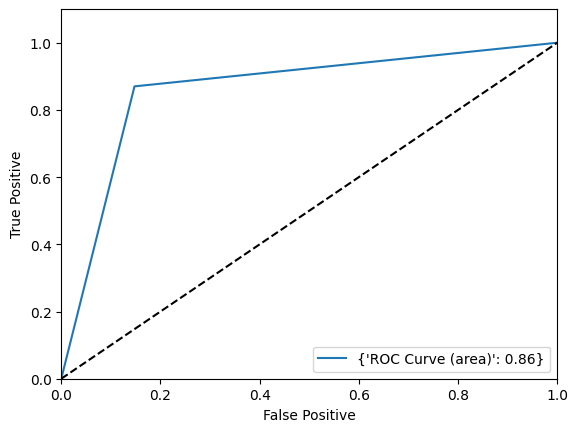

In [159]:
# create a plot for roc and auc curve
roc_point= {"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [160]:
#saving the model using the pickle

with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [161]:
with open(r'C:\Users\ELCOT\Desktop\Srini\VS Code\Projects\Vaccine\Data\Classification_model.pkl',"rb") as f1:
  class_model= pickle.load(f1)

In [162]:
user_data = np.array([[1,1,0,0,0,1,0,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0]])
y_pred_1 = class_model.predict(user_data)
y_pred_1[0]

0